# Two Fluid Quantum Cosmological Model: Evolution of the Modes $\left\{\zeta_{k},S_{k},\Pi_{\zeta k}, \Pi_{Sk} \right\}$

## Key Cells

In [1]:
# Basic Libraries
import sys                                                        # imports the usual sys library
import math                                                       # imports the usual math library
import numpy as np                                                # imports the Numpy Library
from tqdm import tqdm                                             # imports the tqdm library
from scipy.integrate import quad                                  # imports the integration command quad from the scipy library

# Importing the NumCosmo Library
from numcosmo_py import Nc, Ncm                                   # imports the NumCosmo library
# from numcosmo_py.plotting.tools import set_rc_params_article      # imports Numcosmo plotting tools
# set_rc_params_article(ncol=1)

# Plotting
import matplotlib as mpl                                          # imports the full Matplotlib Library
import matplotlib.pyplot as plt                                   # imports the pyplot module from Matplotlib Library
import matplotlib.colors as colors                                # impors the colors module from Matplotlib Library
import matplotlib.cm as cmx                                       # imports the cmx module from Matplotlib Library
# mpl.rcParams['text.usetex'] = True                                # enables the use of TeX on graphs
# plt.rc('text.latex', preamble=r'\usepackage{amssymb}')            # sets the preamble for TeX

# Imports useful commands for the 2fluid model
import two_fluid_key as tf                                        # imports the two_fluid_key.py file, where the relevant quantities are defined

In [2]:
def change_size(S = 25):
  plt.rc('font', size=S)          # controls default text sizes
  plt.rc('axes', titlesize=S)     # fontsize of the axes title
  plt.rc('axes', labelsize=S)    # fontsize of the x and y labels
  plt.rc('xtick', labelsize=S)    # fontsize of the tick labels
  plt.rc('ytick', labelsize=S)    # fontsize of the tick labels
  plt.rc('legend', fontsize=S)    # legend fontsize
  plt.rc('figure', titlesize=S)  # fontsize of the figure title

change_size()

## Introduction

In this notebook we shall analyze the evolution of the adiabatic and entropy modes $\zeta_{k}, S_{k}$ associated to cosmological perturbations of the two fluid quantum cosmological model. Reference $\tt \text{arXiv:1510.06628}$ analyzes the cosmological perturbations formalism for $N$ fluid models. In the 2 fluid case, the obtained perturbative Hamiltonian in Fourier space is given explicitly by

\begin{align}
    \delta {\cal H}^{(2,s)}_{k} & = \frac{1}{2m_{z}}\Pi_{\zeta k}^{2} + \frac{1}{2m_{S}}\Pi_{Sk}^{2} + \left({ \frac{ \bar{c}_{n} }{ \bar{c}_{S}\bar{c}_{m} } }^{2}\frac{1}{m_{\zeta}m_{S}}\frac{1}{NH}\right)\Pi_{\zeta k}\Pi_{Sk} \\
    %
    & \, \, + \frac{1}{2}m_{z}\nu_{\zeta_{k}}^{2} \zeta^{2} + \frac{1}{2}m_{S}\nu_{S}^{2}S_{k}^{2} \, ,
\end{align}

where $\zeta_{k}$ and $Q_{k}$ denote adiabatic and entropy perturbation modes, with $\Pi_{\zeta k}, \Pi_{S k}$ being their associated momenta. We also introduced

\begin{align*}
    m_{\zeta}  \equiv \frac{ a^{3}({ \bar{\rho} + \bar{p} }) }{N\bar{c}_{S}^{2}\bar{H}^{2} }\, , \hspace{2.4cm} & \hspace{-0.1cm} m_{S}  \equiv \frac{ 1 }{  N a^{3}\bar{c}_{m}^2\bar{\omega} } \, ,  \\
    %
    \nu_{\zeta}^{2} \equiv \bar{c}_{S}^{2}F^{2}_{k} \, , \hspace{3.15cm} & \hspace{0.05cm} \nu_{S}^{2} \equiv {c}_{m}^{2}F^{2}_{k} \, ,  \\
    %
    \bar{c}_{S}^{2} \equiv \bar{c}_{1}^{2}\cos^{2}\phi+\bar{c}_{2}^{2}\sin^{2}\phi \, , \hspace{1cm} & \bar{c}_{m}^{2} \equiv \bar{c}_{2}^{2}\cos^{2}\phi+\bar{c}_{1}^{2}\sin^{2}\phi
    \, .
\end{align*}

where $\bar{\omega} \equiv (\rho_1 + p_1)(\rho_2 + p_2)/(\rho + p)$ and $\bar{c}_{n}^{2} \equiv \bar{c}_{1}^{2} - \bar{c}_{2}^{2}$. Here, for later convenience, we have also introduced the angular variable $\phi$ and the functions $F_{k}(t)$ by

\begin{equation}
 \cos^{2}\phi \equiv \frac{ \rho_1 + p_1 }{ \rho + p }\, ,
\end{equation}

\begin{equation}
 \sin^{2}\phi \equiv \frac{ \rho_2 + p_2 }{ \rho + p }\, ,
\end{equation}

\begin{equation}
 \hspace{0.8cm} F^{2}_{k} \equiv \left({\frac{ Nk }{ a }}\right)^{2}\, .
\end{equation}

The angular variable $\phi$ is associated to the dominant fluid, with $\phi=0$ denoting domination by the fluid $1$ and $\phi=\pi/2$ denoting domination by the fluid $2$.

The obtained Hamiltonian for the adiabatic and entropy modes leads to the equations of motion

\begin{align}
  \ddot{\zeta} + R^{-1}_{H,\zeta}\dot{\zeta} + \nu^{2}_{\zeta}\zeta & = -\aleph_{\zeta S}Q + \beth_{\zeta S}\dot{Q} \, , \\
  \ddot{Q} + R^{-1}_{H,S}\dot{Q} + \nu^{2}_{S}Q & = -\aleph_{S\zeta}\zeta + \beth_{S\zeta}\dot{\zeta} \, , \\
\end{align}

where we introduced the effective Hubble radius for the adiabatic and entropy modes

\begin{align}
 R^{-1}_{H,\zeta} & \equiv \left( \frac{ \dot{m}_{\zeta} }{ m_{\zeta} } + Ym_{S}m_{\zeta}\dot{Y} \right)\varrho \, , \\
 R^{-1}_{H,S} & \equiv \left( \frac{ \dot{m}_{S} }{ m_{S} } + Ym_{S}m_{\zeta}\dot{Y} \right)\varrho \, ,
\end{align}

and the couplings

\begin{align}
 \aleph_{\zeta S} & \equiv Ym_{S}\nu^{2}_{S}\, , \, \,  & \, \, \beth_{\zeta S} \equiv \frac{ m_{s} }{ m_{\zeta} }\left( m_{\zeta}\dot{Y} + \dot{m}_{\zeta}Y \right)\varrho  \, , \\
 \aleph_{S\zeta} & \equiv Ym_{\zeta}\nu^2_{\zeta}\, , \, \,  & \, \, \beth_{S\zeta} \equiv \frac{ m_{\zeta} }{ m_{s} }\left( m_{s}\dot{Y} + \dot{m}_{s}Y \right)\varrho  \, .
\end{align}

where $\varrho \equiv (1-Y^{2}m_{S}m_{\zeta})^{-1} $. It is also relevant to point out the dependence of such terms with respect to the mode index $k$. Since $\nu_{\ell}^{2} \sim k^{2}, m_{\ell} \sim k^{0}, Y \sim k^{0}$, we have the following spectral behavior

\begin{align}
  R^{-1}_{H\ell} & \sim k^{0}\, , \\
  \aleph_{\ell\ell^{\prime}} & \sim k^{2}\, , \\
  \beth_{\ell\ell^{\prime}} & \sim k^{0}\, ,
\end{align}

where $\ell = \zeta, Q$ is just a label. This implies that, for large $k$, only the frequency term $\nu^{2}_{\ell}$ and the coordinate-coordinate coupling $\aleph_{\ell}$ are relevant.

In usual cosmological perturbation models, the perturbations are decoupled, which is recovered by setting $Y \rightarrow 0$, so that the equations have a similar form but with $\aleph_{ij} = \beth_{ij} = 0$. One then analyzes two different regimes:

\begin{align}
  \text{ i) Sub-Hubble :} & |R^{-1}_{H, \ell}| \ll \nu_{\ell} \implies \text{oscillatory behavior} \, , \\
  \text{ ii) Super-Hubble :}  & |R^{-1}_{H, \ell}| \gg \nu_{\ell} \implies \text{"frozen" behavior} \, .
\end{align}

Also, since $R_{H\ell} \sim k^{0}, \nu^{2}_{\ell} \sim k^{2}$, for modes with large enough $k$, they will remain sub-Hubble for most of their evolution, that is

\begin{align}
  \text{ i) UV limit} \, \, k \ll k_{\text{crit}} \iff \text{Sub-Hubble} \, \, &  \implies \text{oscillatory behavior} \, , \\
  \text{ ii) IR limit} \, \, k \gg k_{\text{crit}} \iff \text{Super-Hubble}  \, \, & \implies \text{"frozen" behavior} \, ,
\end{align}

where we emphasize that this holds only for an interval of the modes time evolution.

In this model, however, the couplings $\aleph_{\ell}, \beth_{\ell}$ are also relevant, and will lead to non-trival effects apart from the usual oscillatory/frozen behavior. In particular, **even in the deep UV limit $k \gg k_{\text{crit}}$, the modes will still be coupled by the $\aleph_{\ell}$ term**, namely:

\begin{align}
  \ddot{\zeta} + \nu^{2}_{\zeta}\zeta & = -\aleph_{\zeta S}Q \, , \\
  \ddot{Q} + \nu^{2}_{S}Q & = -\aleph_{S\zeta}\zeta  \, . \\
\end{align}

One can also show that, since $\aleph_{ij} \propto \nu_{j}$ and $\nu_{j}$ is large in the past assuming that modes started in a vacuum like state, we have that $\aleph_{ij}$ is also large in the past. Therefore, the modes are coupled even in the sub-Hubble/UV limit. This sub-Hubble behavior means that the WKB approximation does not hold and one cannot impose the usual adiabatic vacuum initial conditions.

While at classical level the equations of motion could be solved by numerical methods, at quantum level this demands the use of special quantization techniques to define the associated vacuum state and extract predictions, as proposed by $\tt \text{arXiv:1510.06628}$ using the Hamiltonian Diagonalization Technique.

The technique amounts to define new canonical variables $\left\{ Q{1}, Q^{2}, P^{1}, P^{2} \right\}$ to diagonalize the perturbative Hamiltonian. Since the obtained canonical transformation is time dependent, the Hamiltonian can only be diagonalized for an initial time instant. However, the coupling between the variables is improved and enables one to define a reasonable vacuum state. For more details, see $\tt \text{arXiv:1510.06628}$.

Therefore, in this notebook, we analyze the evolution of the modes $\{\zeta_{k1}, \zeta_{k2}, S_{k1}, S_{k2}\}$ using the initial conditions obtained using the above technique. Using the evolved modes, one may also calculate the adiabatic and entropy power spectra and other correlation functions, which are available on the $\tt \text{2fluid_adiabatic.ipynb}$ and $\tt \text{2fluid_corr.ipynb}$ files, respectively.

## Defining the Model

In this section we briefly define our cosmological model and explicit our choice of parameters. Note that at this point we shall only use fiducial values for the parameters, with their best fit values being determined later using CMB data.

We start by defining a time variable to evolve our cosmological model and modes. Since in bouncing models one sets the vacuum initial conditions in the far past where the scale factor $a$ is very large with respect to the scale factor at the bounce $a_{\text{B}}$, $|a| \gg a_{B}$, one sees that the model needs to consider different scales for $a$. Due to this fact, we shall use a logarithmic time variable $\alpha$ defined by

$$ \alpha(a) = \ln\left(\frac{ a_{ \text{B} } }{ a }\right) \, . $$

Numerical integration shall then be performed using $\alpha$, and then converted to $a$, which is achieved by using

$$ a(\alpha) = a_{ \text{B} }e^{-\alpha}\, . $$

We shall now implement the interval $\alpha \in (-120,10)$, so that the evolution starts in the far past and ends right after the bounce.

In [19]:
# important times
min_alpha_c = -120.0                                            # defines the initial value of the time variable alpha (α) during the contraction phase
max_alpha_c = -100                                                # defines the final value for α
min_alpha_scale = 1.0e-12                                       # defines the minimum scale e.g. the minimum step of α
np_plot = 100                                                  # plotting variable of the Numpy library

# Time arrays for the contraction phase
alpha_c = np.linspace(min_alpha_c, max_alpha_c, np_plot)        # defines the α interval for the contraction phase

We shall now define a $\tt {\text{NumCosmo}}$ cosmological model object using the $\tt {\text{HICosmoQGRW} }$ method. The cosmological model is then defined by the set of parameters

\begin{align}
  \Omega_{r} & : \text{abundace of radiation} \, , \\
  \Omega_{m} & : \text{abundace of dark matter} \, , \\
  w & : \text{equation of state parameter of dark matter} \, , \\
  a_{\text{B}} & : \text{scale factor at the bounce instant} \, . \\
\end{align}

Note that, while the $\Omega_{r}, \Omega_{m}, w$ parameters are also free parameters of the $\Lambda$-CDM model, the only introduced free parameter is given by the scale factor at the bounce $a_{\text{B}}$, which must be fixed by observations. This also shows that this model is simple with respect to Occam's razor, and that it has less free parameters than usual inflationary models.

In [20]:
# definition of the model

twofluid = Nc.HICosmoQGRW()                                  # defines a cosmological model, which is represented by a NumCosmo object. Then, the relevant cosmological parameters are added to this object

# these lines set the relevant cosmological parameters
k = 1.0         # sets a fiducial value of k
Ωr = 1.0e-5     # abundance of radiation
w = 1.0e-5      # equation of state parameter of dark matter
xb = 1e30       # inverse of scale factor at the bounce, xb = 1/ab

# this lines set the attributes of the cosmological model
twofluid.props.w = w                                         # dust/dark matter equation of state parameter
twofluid.props.Omegar = Ωr                                   # radiation abundance today
twofluid.props.Omegaw = 1.0 * ( 1.0 - Ωr )                   # dust/dark matter abundance today
twofluid.props.xb = xb                                       # inverse scale factor xb=1/ab at the time of the bounce

# evolution of the model
twofluid_c = tf.model_evol(twofluid,alpha_c,k)               # evolves the equations of motion for during the contraction phase using the twofluid_key.py commands

In [21]:
# scale factor a(α)
def a(α, aB = 1.0e-30):
  return aB * np.exp(np.abs(α))                                # defines the scale factor a(α) as a function of logarithmic time α

# scale factor at the bounce
aB = 1 / twofluid.xb()

# scale factor interval for contraction phase
a_c = a(alpha_c) / aB

Now that we have defined our cosmological model, we can calculate some quantities of interest. All background quantities are stored in the $\tt \text{twofluid_c}$ object and have been analyzed in detail in the $\tt \text{2fluid_background.ipynb} $ file. Four our purposes, it suffices to calculate the critical $k$ values. To understand their importance, recall that the speeds of sound of the adiabatic and entropy modes are given by

\begin{align}
    c^{2}_{S} & = c^{2}_{2}\sin^{2}\phi + c^{2}_{1}\cos^{2}\phi \, , \\
    %
    c^{2}_{m} & = c^{2}_{1}\sin^{2}\phi + c^{2}_{2}\cos^{2}\phi \, .  
\end{align}

This means that they coincide for $\phi = \pi/4$, which is the instant of transition between dust domination and radiation domination.  However, since our model presents $c^{2}_{2} \ll c^{2}_{1}$, this implies the existence of two critical values of $\phi$ given by the conditions

\begin{align}
    \phi_{\zeta}: \, \, & c_{2}\sin\phi_{\zeta} = c_{1}\cos\phi_{\zeta} \implies \tan\phi_{\zeta} = \frac{c_{1}}{c_{2}} \, , \\
    %
    \phi_{S}: \, \, & c_{1}\sin\phi_{S} = c_{2}\cos\phi_{S} \implies \tan\phi_{S} = \frac{c_{2}}{c_{1}} \, ,
\end{align}

or, explicitly using $c_{2} = \sqrt{w}, c_{1} = 1/\sqrt{3}$:

\begin{align}
     \tan\phi_{\zeta} & = \frac{ 1 }{ \sqrt{3w} } \, , \\
    %
    \tan\phi_{S} & = \sqrt{3w} \, .
\end{align}

Those two values of $\phi$ are equivalent to instants of time, $\alpha_{\zeta}, \alpha_{S} \iff a_{\zeta}, a_{S}$ that denote when the adiabatic and entropy modes will start to feel the transition from dust domination to radiation domination. In particular, there will be special modes that transition between sub-Hubble and super-Hubble behavior at these specific time instants. We shall denote then by

\begin{align}
  k_{\zeta\zeta} & : \text{adiabatic mode } \, \, \zeta_{k_{\zeta\zeta}} \text{that becomes super-Hubble at} \, \, \phi = \phi_{\zeta}\, , \\
  k_{\zeta S} & : \text{adiabatic mode} \, \, \zeta_{k_{\zeta S}} \text{that becomes super-Hubble at} \, \, \phi = \phi_{S}\, , \\
  k_{S\zeta} & : \text{entropy mode } \, \, S_{k_{S \zeta}} \text{that becomes super-Hubble at} \, \, \phi = \phi_{\zeta}\, , \\
  k_{SS} & : \text{entropy mode } \, \, S_{k_{SS}} \text{that becomes super-Hubble at} \, \, \phi = \phi_{S}\, .
\end{align}

This $k$ values will prove to be useful to understand features of the power spectra and other correlation functions, namely the transitions between dust domination and radiation domination on the spectra.

We now turn to calculate said special values of $\alpha$ and $k$ using the commands from the $\tt \text{twofluid_key.py}$ file.

In [22]:
%%time

# special time instants
tz = twofluid_c.tz            # defines the time instant αζ such that ϕ = ϕζ
ts = twofluid_c.ts            # defines the time instant αS such that ϕ = ϕS
tc = twofluid_c.tc            # defines the time instant αc such that ϕ = π/4

# special scale factor values
az = a(tz)                    # defines the scale factor aζ such that ϕ = ϕζ
aS = a(ts)                    # defines the scale factor aζ such that ϕ = ϕS
ac = a(tc)                    # defines the scale factor aζ such that ϕ = π/4

# critical values of k
k_range = np.geomspace(1e-10, 1e14, 10**3)      # sets an interval of k to calculate the special k values
kzz = twofluid_c.kz1()                          # calculates kζζ
kzS = twofluid_c.kz2()                          # calculates kζS
kSz = twofluid_c.ks1(k_range)                   # calculates kSζ
kSS = twofluid_c.ks2(k_range)                   # calculates kSS
kc = twofluid_c.kcrit()                         # calculates the critical value kc. Note that we have not calculated one kc for the adiabatic mode and other for the entropy one. This is due to the fact that, according to the background analysis present on 2fluid_background.ipynb, their crossing times coincide at the critical time instant

# prints the results

# prints the special alpha values
print('αζ = ' + format(tz, '.2f'))              # prints αζ
print('αS = ' + format(ts, '.2f'))              # prints αS
print('αc = ' + format(tc, '.2f'))              # prints αc

print('-------------')

# prints the special scale factor values
print('aζ = ' + format(az, '.2e'))              # prints αζ
print('aS = ' + format(aS,  '.2e'))              # prints αS
print('ac = ' + format(ac,  '.2e'))              # prints αc

print('-------------')

# prints the special k values
print('kζζ = ' + f"{kzz:.2e}")                  # prints kζζ
print('kζS = ' + f"{kzS:.2e}")                  # prints kζS
print('kSζ = ' + f"{kSz:.2e}")                  # prints kSζ
print('kSS = ' + f"{kSS:.2e}")                  # prints kSS
print('kc = ' + f"{kc:.2e}")                    # prints kc

1000.0
αζ = -100.00
αS = -100.00
αc = -100.00
-------------
aζ = 2.69e+13
aS = 2.69e+13
ac = 2.69e+13
-------------
kζζ = 1.00e+01
kζS = 1.00e+06
kSζ = 2.31e-07
kSS = 2.31e-07
kc = 1.00e+03
CPU times: user 2.06 s, sys: 3.99 ms, total: 2.06 s
Wall time: 2.06 s


In the above, note that we have the hierarchies

\begin{align}
  \alpha_{\zeta} < & \, \, \alpha_{c} < \alpha_{S} \, , \\
  \implies k_{\zeta\zeta}  < & \, \, k_{c} < k_{\zeta S}\, , \\
  \implies k_{S\zeta}  < & \, \, k_{c} < k_{SS}\, ,
\end{align}

which was to be expected based on the background analysis present on $\tt \text{2fluid_background.ipynb}$. Furthermore, note that $k_{\zeta S}, k_{SS}$ are very large values. This is a problem, for large values $k$ demand great computational power. Due to this reasons, we shall now evaluate the evolution of modes for the following values of $k$, in order to understand their behavior:

$$ k \in \left\{ 10^{-8}, 10^{-4}, 10^{-2}, 1, k_{S\zeta}, 10^{2}, k_{\zeta\zeta}, k_{c}, 10k_{c}\right\}\, .$$

To do so, we shall now evolve the modes associated to each value of $k$ on the previously defined time interval. It should be pointed out that, due to the presence of two fields, we need to integrate the modes for two sets of initial conditions, namely:

\begin{align}
  \text{Initial Condition 1:} & \, \, Q_{1} \, \, \text{is dominant and } Q_{2} \, \, \text{is sub-dominant} \, , \\
  %
  \text{Initial Condition 2:} & \, \, Q_{2} \, \, \text{is dominant and } Q_{1} \, \, \text{is sub-dominant} \, , \\
\end{align}

where the $Q_{i}$ amount to variables used in the Hamiltonian Tensor Diagonalization Technique. They are associated to the adiabatic and entropy modes by the canonical transformation

\begin{align}
    \zeta_{k} & = \frac{ 1 }{ \sqrt{m_{\zeta}}\nu_{\zeta} }\left({ \sqrt{\nu_{1}}\cos\phi Q_{1k} - \sqrt{\nu_{2}}\sin\phi Q_{2k} }\right)\, , \\
    %
    S_{k} & = \frac{ 1 }{ \sqrt{m_{S}}\nu_{S} }\left({ \sqrt{\nu_{1}}\sin\phi Q_{1k} - \sqrt{\nu_{2}}\cos\phi Q_{2k} }\right)\, ,
\end{align}

where the $\nu_{i}$ are the eigenvalues of the Hamiltonian Tensor, and coincide with the speeds of sound of each fluid $c_{i}$. One then sees that, in the far past where initial conditions are set, we have dust domination $\iff \phi \approx \pi/2 $, so that, in the past

\begin{align}
    \zeta_{k} & \approx -\frac{ \sqrt{\nu_{2}}  }{ \sqrt{m_{\zeta}}\nu_{\zeta} }{ Q_{2k} }\, , \\
    %
    S_{k} & \approx \frac{ \sqrt{\nu_{1}} }{ \sqrt{m_{S}}\nu_{S} }{ Q_{1k}  }\, ,
\end{align}

which means that, in the past, we have, for each initial condition:

\begin{align}
  \text{Initial Condition 1:} & \, \, S \, \, \text{is dominant and } \zeta \, \, \text{is sub-dominant} \, , \\
  %
  \text{Initial Condition 2:} & \, \, \zeta \, \, \text{is dominant and } S \, \, \text{is sub-dominant} \, . \\
\end{align}

In the future, during radiation domination, we obtain the reversed behavior:

\begin{align}
    \zeta_{k} & \approx -\frac{ \sqrt{\nu_{1}}  }{ \sqrt{m_{\zeta}}\nu_{\zeta} }{ Q_{1k} }\, , \\
    %
    S_{k} & \approx -\frac{ \sqrt{\nu_{2}} }{ \sqrt{m_{S}}\nu_{S} }{ Q_{2k}  }\, .
\end{align}

We shall now integrate the system and plot graphs to understand the evolution of the modes.

In [23]:
kmean = np.sqrt( kzz * kc )

print( np.log(kzz), np.log(kmean), np.log(kc) )

2.302585092994046 4.605170185988092 6.907755278982137


In [24]:
%%time
# list of k values
#k_list = [1e-8, 1e-4, 1e-2, 1, kSz, 1e2, kzz ,kc, 5 * kc]  # defines a different list of k's
k_paper = [kzz / 1000, kmean, kc * 1000]                    # sets a list of values to be used in the 2fluid paper
k_list = k_paper                                          # sets the k_list to be equal the k_paper list
#k_list = [1,kc]                                            # defines a testing list. Uncomment this line to make the code go faster

# precision parameters
p1 = 1.0e-4
p2 = 0.0

# Generates the Modes & Models
mode1_list = [tf.mode_1(k,twofluid, p1, p2, max_alpha_c ) for k in k_list]  # generates a list with each mode associated to the Initial Condition 1 for our cosmological model
mode2_list = [tf.mode_2(k,twofluid, p1, p2, max_alpha_c) for k in k_list]  # generates a list with each mode associated to the Initial Condition 2 for our cosmological model
model_list = [tf.model_evol(twofluid, alpha_c, k) for k in k_list]  # generates a list of evolved models for each k

CPU times: user 68.6 ms, sys: 995 μs, total: 69.6 ms
Wall time: 68.9 ms


The above cell is the main calculation of this notebook. Now that the coupled system was integrated, we may move to plot their behavior. However, before that, let us analyze the lenght of each mode.

In [30]:
print(mode1_list[0].k)

0.01


In [27]:
# prints the length of each mode for Initial Condition 1
for init in mode1_list:
  print( 'k = ' + f"{init.k:.2e}" + ' => ' + str(len(init.zeta_r()) ) )

# a sepator between the two initial conditions
print('----------------------------------------------------------------------------------------------------')

# prints the length of each mode for Initial Condition 2
for init in mode2_list:
  print( 'k = ' + f"{init.k:.2e}" + ' => ' + str(len(init.zeta_r()) ) )

k = 1.00e-02 => 1
k = 1.00e+02 => 1
k = 1.00e+06 => 1
----------------------------------------------------------------------------------------------------
k = 1.00e-02 => 62
k = 1.00e+02 => 1
k = 1.00e+06 => 1


One then sees that, for Initial Condition 1, the lenght of the modes grows vary fast. This happens due to the fact that, if a given mode starts deep in its super-Hubble limit, it takes lots of numeric steps to integrate the system before its super-Hubble regime.

We now move to analyze the graphical behavior for each mode. However, as a final step, we shall also integrate the system for another list of $k$'s for later convenience.

In [26]:
%%time

#k_colors = [1e-6, kSz , kzz , 10*kzz , kc, 3 * kc]                         # defines a different list of k's
#k_colors = [1,kc]                                                          # defines a testing list. Uncomment this line to make the code go faster
#k_colors = k_paper                                                          # sets the k_list to be equal the k_paper list
k_sub_values = [ [k * ( 10.0 ** n) for n in (-1,0,1)] for k in k_list ]     # defines a list of close values of k for each value of k_colors

# Generates the Modes & Models
mode1_list_colors = [ [tf.mode_1(k,twofluid, p1, p2, max_alpha_c ) for k in sub_list] for sub_list in k_sub_values ]  # generates a list with each mode associated to the Initial Condition 1 for our cosmological model
mode2_list_colors = [ [tf.mode_2(k,twofluid, p1, p2, max_alpha_c ) for k in sub_list] for sub_list in k_sub_values ]  # generates a list with each mode associated to the Initial Condition 1 for our cosmological model
model_list_colors = [ tf.model_evol(twofluid, alpha_c, k) for k in k_list ]                                 # generates a list of evolved models for each k

CPU times: user 257 ms, sys: 1.98 ms, total: 259 ms
Wall time: 258 ms


## Coordinate Modes $\{\zeta_{k}, S_{k} \}$

In this section, we turn to plot and discuss the behavior of the coordinate modes $\{\zeta_{k\ell}, S_{k\ell} \}$ for various values of $k$. Their behavior can be visualized in the next cell, for which we have plotted the time evolution of their real parts:

In [15]:
def change_size(S = 25):
  plt.rc('font', size=S)          # controls default text sizes
  plt.rc('axes', titlesize=S)     # fontsize of the axes title
  plt.rc('axes', labelsize=S)    # fontsize of the x and y labels
  plt.rc('xtick', labelsize=S)    # fontsize of the tick labels
  plt.rc('ytick', labelsize=S)    # fontsize of the tick labels
  plt.rc('legend', fontsize=S)    # legend fontsize
  plt.rc('figure', titlesize=S)  # fontsize of the figure title

change_size()

k << kζζ


TypeError: loop of ufunc does not support argument 0 of type float which has no callable log10 method

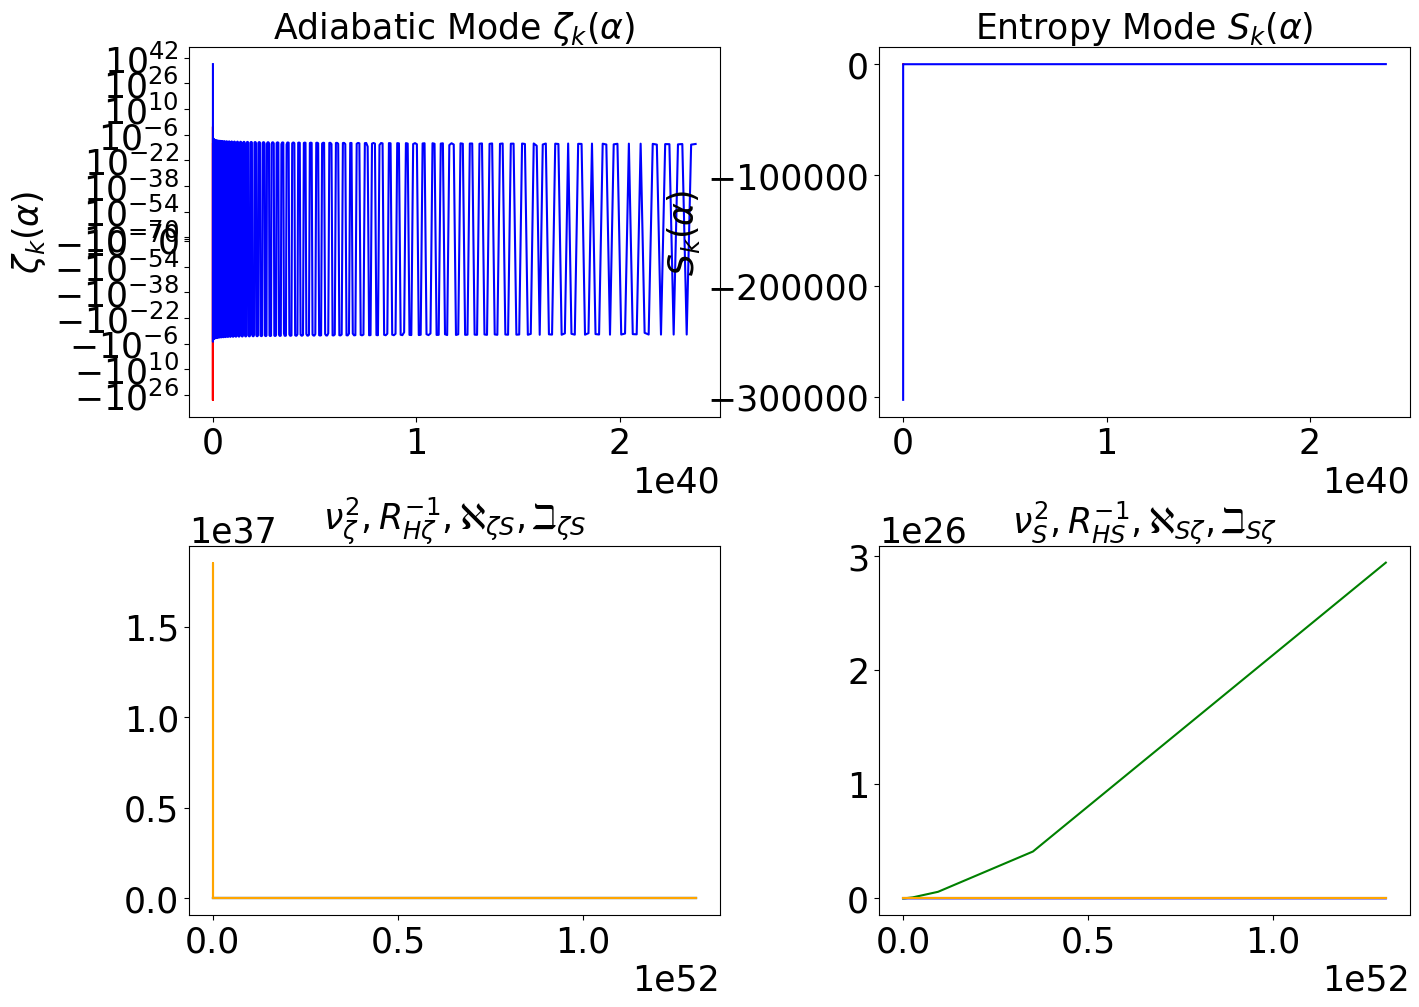

In [16]:
%%time

change_size()

# figure parameters
r = 2   # number of rows
c = 2   # number of columns

#k_list = [1]
# defines a for loop to plot the coordinate modes {ζkℓ,Skℓ} for each value of k
for j in range(len(k_list)):
  k = k_list[j]  # sets k to be equal to each value of the k_list per iteration

  # prints the respective k interval
  if j==0:
    k_text = r'k << kζζ'
    k_val_text = r'$k = k_{\zeta\zeta}/1000$'
    k_name = 'k_dust'
  if j==1:
    k_text = 'kζζ < k < kc'
    k_val_text = r'$k = \sqrt{k_{\zeta\zeta}k_{c}}$'
    k_name = 'k_trans'
  if j==2:
    print()
    k_text = 'kc << k'
    k_val_text = r'$k = 1000k_{c}$'
    k_name = 'k_rad'
  print(k_text)

  # Defines one r x c figure per value of k
  fig, ax = plt.subplots(r,c, figsize=(14, 10))                                               # sets the size of the figure
  #fig, ax = plt.subplots(r,c)                                               # sets the size of the figure
  fig.tight_layout()                                                                          # sets the size of each plot within the figure
  fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3, hspace=0.35)   # sets the space between each plot

  # Defining the modes
  init1 = mode1_list[j]         # defines a variable associated to the modes of Initial Condition 1 per each value of k
  init2 = mode2_list[j]         # defines a variable associated to the modes of Initial Condition 2 per each value of k
  twofluid_k = model_list[j]    # defines a variable associated to the models per each value of k

  # Plots the Adiabatic Modes
  ax[0,0].plot(a(init1.t)/aB, init1.zeta_r() , label = r'$\zeta_{k1}(a)$', color='red')                         # plots ζk1, the adiabatic mode associated to Initial Condition 1
  ax[0,0].plot(a(init2.t)/aB, init2.zeta_r(), label = r'$\zeta_{k2}(a)$' , color='blue')                        # plots ζk2, the adiabatic mode associated to Initial Condition 2

  # Plots the Entropy Modes
  ax[0,1].plot(a(init1.t)/aB, init1.s_r(), label=r'$S_{k1}(a)$', color='red')                                   # plots Sk1, the entropy mode associated to Initial Condition 1
  ax[0,1].plot(a(init2.t)/aB, init2.s_r(), label=r'$S_{k2}(a)$', color='blue')                                  # plots Sk2, the entropy mode associated to Initial Condition 2

  # Adiabatic Effective Couplings
  ax[1,0].plot(a_c, twofluid_k.nuz**2, label = r'$\nu^{2}_{\zeta}$', color='blue')                    # plots νζ², the frequency squared  of the adiabatic modes
  ax[1,0].plot(a_c, np.abs(twofluid_k.Rh_z), label=r'$|R^{-1}_{H\zeta}|$', color='black')                        # plots R⁻¹_Hζ, the inverse effective adiabatic Hubble radius
  ax[1,0].plot(a_c, np.abs(twofluid_k.aleph_zs) * (k**2), label=r'$\aleph_{\zeta S}$', color='green')     # plots ℵ_ζS, adiabatic-to-entropy sub-Hubble coupling
  ax[1,0].plot(a_c, np.abs(twofluid_k.beth_zs), label=r'$\beth_{\zeta S}$', color='orange')               # plots ℶ_ζS, adiabatic-to-entropy super-Hubble coupling
  #ax[1,0].plot(alpha_c, twofluid_k.wz, label=r'$\omega^{2}_{\zeta}$', color='pink')                          # plots the ωζ, the frequency of the adiabatic Mukhanov-Sasaki variable

  # Entropy Effective Couplings
  ax[1,1].plot(a_c, twofluid_k.nus**2, label = r'$\nu^{2}_{S}$', color='blue')                        # plots the frequency squared νS² of the entropy modes
  ax[1,1].plot(a_c, np.abs( twofluid_k.Rh_s ), label=r'$|R^{-1}_{H S}|$', color='black')                         # plots R⁻¹_HS, the inverse effective adiabatic Hubble radius
  ax[1,1].plot(a_c, np.abs(twofluid_k.aleph_sz) * (k**2), label=r'$\aleph_{S\zeta}$', color='green')      # plots ℵ_Sζ, entropy-to-adiabatic sub-Hubble coupling
  ax[1,1].plot(a_c, np.abs(twofluid_k.beth_sz), label=r'$\beth_{S\zeta}$', color='orange')                # plots ℶ_Sζ, entropy-to-adiabatic super-Hubble coupling
  #ax[1,1].plot(alpha_c, twofluid_k.ws, label=r'$\omega^{2}_{S}$', color='brown')                             # plots the ωS, the frequency of the entropy Mukhanov-Sasaki variable

  ##################################################################################################################################################################################################

  # Legends

  # Titles
  #ax[0,0].set_title(r'$\zeta_{k}(\alpha)$' + "$, k =$" + k_val_text )                               # sets the legend of the adiabatic modes plot
  #ax[0,1].set_title(r'$S_{k}(\alpha)$' + "$, k =$" + k_val_text )                                   # sets the legend of the entropy modes plot
  #ax[1,0].set_title(r'$\nu^{2}_{\zeta}, R^{-1}_{H\zeta}, \aleph_{\zeta S}, \beth_{\zeta S}$')       # sets the legend of the adiabatic effective couplings plot
  #ax[1,1].set_title(r'$\nu^{2}_{S}, R^{-1}_{H S}, \aleph_{S\zeta}, \beth_{S\zeta}$')                # sets the legend of the entropy effective couplings plot

  ax[0,0].set_title(r'Adiabatic Mode $\zeta_{k}(\alpha)$'  )                               # sets the legend of the adiabatic modes plot
  ax[0,1].set_title(r'Entropy Mode $S_{k}(\alpha)$' )                                   # sets the legend of the entropy modes plot
  ax[1,0].set_title(r'$\nu^{2}_{\zeta}, R^{-1}_{H\zeta}, \aleph_{\zeta S}, \beth_{\zeta S}$')       # sets the legend of the adiabatic effective couplings plot
  ax[1,1].set_title(r'$\nu^{2}_{S}, R^{-1}_{H S}, \aleph_{S\zeta}, \beth_{S\zeta}$')                # sets the legend of the entropy effective couplings plot


  # Sets the y labels
  ax[0,0].set_ylabel(r'$\zeta_{k}(\alpha)$')    # sets a label to the y axis of the norm of adiabatic modes plot for Initial Condition 1
  ax[0,1].set_ylabel(r'$S_{k}(\alpha)$')        # sets a label to the y axis of the norm of entropy modes plot for Initial Condition 1

  if j==0:
    n_ticks = 3
    ax[0,0].set_yscale('symlog', linthresh=1e-70)     # sets a log scale that allows negative values for the mode plots
    ax[0][0].set_yticks( list( np.geomspace( -1e-60, -10**int(np.log10( ax[0][0].set_ylim()[-1] )), n_ticks ) ) + list( np.geomspace( 1e-60, 10**int(np.log10( ax[0][0].set_ylim()[-1] )), n_ticks ) ) )
    ax[0,1].set_yscale('symlog', linthresh=1e45)     # sets a log scale that allows negative values for the mode plots
    #ax[0][1].set_yticks( list( np.geomspace( 1e50, 10**int(np.log10( np.abs(ax[0][1].set_ylim()[-1] ) )), n_ticks ) ) + list( np.geomspace( 1e50, 10**int(np.log10( np.abs(ax[0][1].set_ylim()[-1] ) )), n_ticks ) ) )
    ax[0][1].set_yticks( list( np.geomspace(-1e50, -1e80, n_ticks) ) + list( np.geomspace(1e50, 1e80, n_ticks) )   )

  if j==1:
    n_ticks = 3
    ax[0,0].set_yscale('symlog', linthresh=1e-70)     # sets a log scale that allows negative values for the mode plots
    ax[0][0].set_yticks( list( np.geomspace( -1e-60, -10**int(np.log10( ax[0][0].set_ylim()[-1] )), n_ticks ) ) + list( np.geomspace( 1e-60, 10**int(np.log10( ax[0][0].set_ylim()[-1] )), n_ticks ) ) )
    ax[0,1].set_yscale('symlog', linthresh=1e45)     # sets a log scale that allows negative values for the mode plots
    #ax[0][1].set_yticks( list( np.geomspace( 1e50, 10**int(np.log10( np.abs(ax[0][1].set_ylim()[-1] ) )), n_ticks ) ) + list( np.geomspace( 1e50, 10**int(np.log10( np.abs(ax[0][1].set_ylim()[-1] ) )), n_ticks ) ) )
    ax[0][1].set_yticks( list( np.geomspace(-1e50, -1e80, n_ticks) ) + list( np.geomspace(1e50, 1e80, n_ticks) )   )

  if j==2:
    n_ticks = 3
    ax[0,0].set_yscale('symlog', linthresh=1e-70)     # sets a log scale that allows negative values for the mode plots
    ax[0][0].set_yticks( list( np.geomspace( -1e-60, -10**int(np.log10( ax[0][0].set_ylim()[-1] )), n_ticks ) ) + list( np.geomspace( 1e-60, 10**int(np.log10( ax[0][0].set_ylim()[-1] )), n_ticks ) ) )
    ax[0,1].set_yscale('symlog', linthresh=1e45)     # sets a log scale that allows negative values for the mode plots
    #ax[0][1].set_yticks( list( np.geomspace( 1e50, 10**int(np.log10( np.abs(ax[0][1].set_ylim()[-1] ) )), n_ticks ) ) + list( np.geomspace( 1e50, 10**int(np.log10( np.abs(ax[0][1].set_ylim()[-1] ) )), n_ticks ) ) )
    ax[0][1].set_yticks( list( np.geomspace(-1e50, -1e80, n_ticks) ) + list( np.geomspace(1e50, 1e80, n_ticks) )   )


  # creates loops to iterate over each graph
  for i in range(r):                                      # iterates over each row
    for j in range(c):                                    # iterates over each column

      # Characteristic Transition Times
      #ax[i,j].axvline(x = az/aB, color='olive', linestyle=':', label=r'$a_{\zeta}$')                  # plots aζ, the characteristic time instant for which the speed of sound of the adiabatic mode starts to vary
      #ax[i,j].axvline(x = aS/aB, color='brown', linestyle=':', label=r'$a_{S}$')                      # plots aS, the characteristic time instant for which the speed of sound of the entropy mode starts to vary
      #ax[i,j].axvline(x = ac/aB, color='yellow', linestyle=':', label=r'$a_{c}$')                     # plots ac, the transition time instant

      # Horizon Crossing Times of each mode
      #ax[i,j].axvline(x = a(twofluid_k.cross_z(k))/aB, color='purple', linestyle='--', label=r'$a^{\zeta}_{ cross }$ = ' + f"{a(twofluid_k.cross_z(k)):.2e}" ) # plots the time for which the adiabatic mode frequency coincides with its effective Hubble radius
      #ax[i,j].axvline(x = a(twofluid_k.cross_s(k))/aB, color='orange', linestyle='--', label=r'$a^{S}_{ cross }$ = ' + f"{a(twofluid_k.cross_s(k)):.2e}" )     # plots the time for which the entropy mode frequency coincides with its effective Hubble radius
      #ax[i,j].axvline(x = 1, color='black', linestyle=':', label=r'$\alpha = \alpha_{B} = 0$' )                                                            # plots the bouncing time instant

      # Characteristic Transition Times
      ax[i,j].axvline(x = az/aB, color='olive', linestyle=':')                  # plots aζ, the characteristic time instant for which the speed of sound of the adiabatic mode starts to vary
      ax[i,j].axvline(x = aS/aB, color='brown', linestyle=':')                      # plots aS, the characteristic time instant for which the speed of sound of the entropy mode starts to vary
      ax[i,j].axvline(x = ac/aB, color='yellow', linestyle=':')                     # plots ac, the transition time instant

      # Horizon Crossing Times of each mode
      ax[i,j].axvline(x = a(twofluid_k.cross_z(k))/aB, color='purple', linestyle='--' ) # plots the time for which the adiabatic mode frequency coincides with its effective Hubble radius
      ax[i,j].axvline(x = a(twofluid_k.cross_s(k))/aB, color='orange', linestyle='--' )     # plots the time for which the entropy mode frequency coincides with its effective Hubble radius
      #ax[i,j].axvline(x = 1, color='black', linestyle=':', label=r'$\alpha = \alpha_{B} = 0$' )                                                            # plots the bouncing time instant

      # Sets the y scales
      ax[i,j].set_xscale('log')                           # sets a x log scale for the plots
      ax[i,j].set_xlim(a_c[0],a_c[-1])                    # sets the x limits
      if i < 1:
        b = ax[i,j].set_ylim()
        #ax[i,j].set_yscale('symlog', linthresh=1e-60)     # sets a log scale that allows negative values for the mode plots
        #ax[i,j].legend(fontsize=15)                       # shows the legend and sets the legend font size
        #ax[i,j].legend()                       # shows the legend and sets the legend font size
      else:
        ax[i,j].set_yscale('log')                         # sets a log scale for the effective couplings plots
        #ax[i,j].legend(fontsize=12)                       # shows the legend and sets the legend font size
        #ax[i,j].legend()                       # shows the legend

      # Annotations
      factor = 1.5
      x0, y0 = 3, 18
      if [i, j] == [0,0]:
        factor = 1e-1
        print( ax[i,j].set_ylim()[0] * factor )

      # critical scale factors
      ax[i,j].annotate(r'$a_{c}$', xy=(ac/aB, ax[i,j].set_ylim()[0] * factor), xycoords='data',
              xytext=(x0, y0), textcoords='offset points', color='black', verticalalignment='top')
      ax[i,j].annotate(r'$a_{\zeta}$', xy=(az/aB, ax[i,j].set_ylim()[0] * factor), xycoords='data',
                    xytext=(x0, y0), textcoords='offset points', color='black', verticalalignment='top')
      ax[i,j].annotate(r'$a_{S}$', xy=(aS/aB, ax[i,j].set_ylim()[0] * factor), xycoords='data',
                    xytext=(x0, y0), textcoords='offset points', color='black', verticalalignment='top')

      # Hubble crossing times
      x0, y0 = -20, -3
      factor = 1e-5
      if [i,j] == [1,0]:
        factor = 1e-5
      ax[i,j].annotate(r'$a^{\zeta}_{\hbox{\tiny cross }}$', xy=(a(twofluid_k.cross_z(k))/aB, ax[i,j].set_ylim()[-1] * factor), xycoords='data',
                    xytext=(x0, y0), textcoords='offset points', color='black', verticalalignment='top')
      ax[i,j].annotate(r'$ a^{S}_{\hbox{\tiny cross}}$ ', xy=(a(twofluid_k.cross_s(k))/aB, ax[i,j].set_ylim()[-1] * factor), xycoords='data',
                    xytext=(x0, y0), textcoords='offset points', color='black', verticalalignment='top')


      # Labels
      ax[i,j].set_xlabel(r'$a/a_{\hbox{B}}$')    # sets a label to x axis as time
      ax[i,j].set_ylim( ax[i,j].set_ylim()[0] * 1e5, ax[i,j].set_ylim()[-1] * 1e10 )
      ax[i,j].legend(loc="best")                   # prints the legend

  #print('k ~ '+str(f"{k:.2e}"))     # prints the value of k for each mode

  # a separator between each plot
  print('-------------------------------------------------------------------------------------------------------------------------------------------------------------')

###############################################################################################################################

  # shows the figure per each mode
  #fig.suptitle(r'Coordinate Modes')
  plt.savefig(f"graphs/"+k_name+".pdf", bbox_inches="tight")       # saves the figure
  plt.show()

The above plots convey lots of information. First, one readily notices that, in general, modes start in a highly oscillatory state, which is typical from the usual sub-Hubble regimes of cosmological perturbations. This also shows that the proposed vacuum state is consistent with the common intuition of oscillatory WKB approximations, even in the presence of coupling.

As discussed, two curves were plotted for each mode: $\require{xcolor}{  \color{red}{\text{Initial Condition 1}} }$ and $\require{xcolor}{  \color{blue}{\text{Initial Condition 2}} }$. If one analyzes the usual horizon crossing condition for each mode, that is

$$ \nu_{\ell} \approx R^{-1}_{H\ell}\, , $$

one notices that, as expected, the oscillating behavior transitions to a "frozen" behavior for entropy modes, where their amplitude is constant, and an amplifying regime for adiabatic modes, where their amplitude is enhanced. It should be noted, however, that the said transition must be analyzed in terms of the dominant mode: it is when its frequency equals the inverse effective Hubble radius that both modes of a same initial condition become super-Hubble. The frequency condition, however, is not a precise criteria for sub-Hubble - super-Hubble transition for $k > k_{\zeta\zeta}$, for such modes cross the horizon at the dust-to-radiation transition period, where the couplings are relevant and the modes $\zeta_{k}, S_{k}$ become a mixture of the diagonalizing variables $\left\{Q_{1}, Q_{2}\right\}$. As an additional comment, its interesting to point out that, while one of the modes crosses the horizon in the sense $\nu_{\ell} \approx R^{-1}_{H\ell}$, the couplings of the other moment coincide, e.g. $\nu_{\zeta} \approx R^{-1}_{H\zeta} \implies \aleph_{S\zeta} \approx \beth_{S\zeta}$, which occurs to the behavior $\aleph_{ij} \sim Y\nu_{j}, \beth_{ij} \sim Y R^{-1}_{Hj}$.

Regarding the super-Hubble behavior of the modes, one notices that, while adiabatic modes are amplified, entropy modes have constant amplitude. This can be understood by analyzing the super-Hubble expansion (for coupled systems) derived on Appendix A. At zeroth order on $k$, which is achieved by imposing $ k \approx 0 \implies \nu_{\ell} \approx 0$, the Hamilton equations reduce to

\begin{align}
        \dot{ \zeta k} =  \frac{ 1 }{ m_\zeta }\Pi_{\zeta k} + Y\Pi_{Sk} \, , \, \, \, \, \, \, \dot{ \Pi }_{\zeta k}  = 0\, , \\
    %
        \dot{ S k} =  \frac{ 1 }{ m_S }\Pi_{Sk} + Y\Pi_{\zeta k} \, , \, \, \, \, \dot{ \Pi }_{Sk}  = 0 \, ,  \\
\end{align}

which shows that the momenta are constant in the deep super-Hubble regime:

\begin{align}
  \Pi_{\zeta k}(\alpha) & \approx p_{z}(k)\, , \\
  \Pi_{Sk}(\alpha) & \approx p_{S}(k)\, .
\end{align}

This means that the second pair of Hamilton equations can be easily integrated to yield the solutions

\begin{align}
  \zeta_{k}(\alpha) & = \zeta_{0}(k) + p_{z}(k)\int^{\alpha}_{\alpha_{0}}\frac{ d\alpha^{\prime} }{ m_{\zeta}(\alpha^{\prime}) } - p_{S}(k)\int^{\alpha}_{\alpha_{0}}Y(\alpha^{\prime})d\alpha^{\prime}\, , \\
  %
  S_{k}(\alpha) & = S_{0}(k) + p_{S}(k)\int^{\alpha}_{\alpha_{0}}\frac{ d\alpha^{\prime} }{ m_{S}(\alpha^{\prime}) } - p_{z}(k)\int^{\alpha}_{\alpha_{0}}Y(\alpha^{\prime})d\alpha^{\prime}\,  .
\end{align}

which are valid in the deep super-Hubble limit, where the frequencies $\nu_{\ell}$ are not relevant for the evolution. One also notes that, as expected, the proposed solution recovers the usual single field solution in the limit of vanishing coupling $Y \rightarrow 0$ $\tt \text{arXiv:1111.0888}$.

While the constant mode and the coupling terms are present in both modes (and saturates since $Y \rightarrow 0$ for single fluid domination), what explains the different behavior is the dynamics of the masses $m_{\zeta}, m_{S}$. As discussed in the notebook $\tt \text{2fluid_background.ipynb}$, the entropy mass is always increasing, while the adiabatic mass $m_{\zeta}$ is always decreasing. This means that the integral

$$ \int_{\alpha_{0}}^{\alpha}\frac{d\alpha^{\prime}}{m_{S}(\alpha^{\prime})}$$

quickly saturates and leads to a constant behavior for $S_{k}(\alpha)$. Its adiabatic counterpart, however

$$ \int_{\alpha_{0}}^{\alpha}\frac{d\alpha^{\prime}}{m_{\zeta}(\alpha^{\prime})}$$

is always increasing, which means that the adiabatic coordinate mode $\zeta_{k}(\alpha)$ is always amplified in its super-Hubble regime, regarding of its initial conditions at horizon crossing $\zeta_{k}(\alpha=\alpha_{\text{cross}}(k))$. Therefore, the power spectrum of the adiabatic mode will consistently have a much larger amplitude than its entropy counterpart, which is a natural consequency of the model, and does not demand any additional assumptions. Furthermore, the above also shows that this fact is maintained even after the bounce, where $m_{\zeta}$ starts to decrease and leads to a "frozen" behavior for $\zeta_{k}$, while $S_{k}$ remains constant even with a decreasing $m_{S}$ due to the fact that, in the expansion phase, $\alpha > 0$.

We now turn to analyze the evolution of the norms $\left\{ |\zeta_{k}|^{2}, |S_{k}|^{2}\right\}$ to gain further insight into the power spectra.

k << kζζ


TypeError: loop of ufunc does not support argument 0 of type float which has no callable log10 method

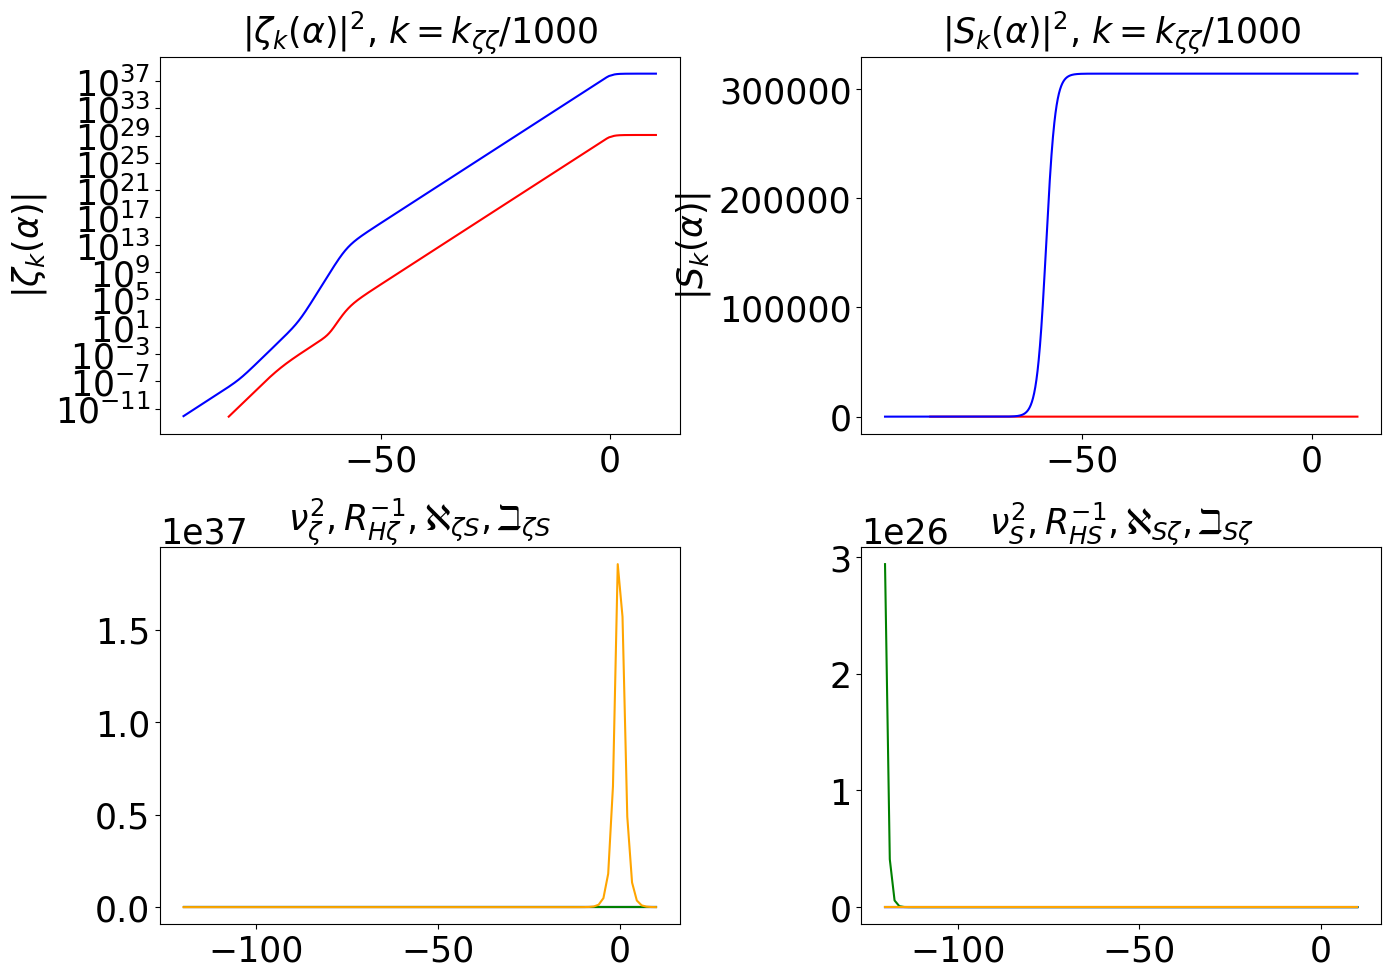

In [17]:
%%time

change_size()

# Norm evolution

# defines a for loop to plot the norm of the coordinate modes, {|ζkℓ|,|Skℓ|} for each value of k
for j in range(len(k_list)):
  k = k_list[j] # sets k to be equal to each value of the k_list per iteration

  # prints the respective k interval
  if j==0:
    k_text = r'k << kζζ'
    k_val_text = r', $k = k_{\zeta\zeta}/1000$'
    k_name = 'k_dust_norm'
  if j==1:
    k_text = 'kζζ < k < kc'
    k_val_text = r', $k = \sqrt{k_{\zeta\zeta}k_{c}}$'
    k_name = 'k_trans_norm'
  if j==2:
    print()
    k_text = 'kc << k'
    k_val_text = r', $k = 1000k_{c}$'
    k_name = 'k_rad_norm'
  print(k_text)

  # Defines one r x c figure per value of k
  fig, ax = plt.subplots(r,c, figsize=(14, 10))                                               # sets the size of the figure
  fig.tight_layout()                                                                          # sets the size of each plot within the figure
  fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.35, hspace=0.3)   # sets the space between each plot

  # Defining the modes
  init1 = mode1_list[j]         # defines a variable associated to the modes of Initial Condition 1 per each value of k
  init2 = mode2_list[j]         # defines a variable associated to the modes of Initial Condition 2 per each value of k
  twofluid_k = model_list[j]    # defines a variable associated to the models per each value of k

  # Plots the Norm of the Adiabatic Modes
  ax[0,0].plot(init1.t, np.sqrt( k**3 * (init1.zeta_r()**2 + init1.zeta_im()**2 ) ) , label=r'$\zeta_{k1}(\alpha)$', color='red')    # plots |ζk1|, the norm of the adiabatic mode associated to Initial Condition 1
  ax[0,0].plot(init2.t, np.sqrt( k**3 * (init2.zeta_r()**2 + init2.zeta_im()**2 ) ), label=r'$\zeta_{k2}(\alpha)$', color='blue')    # plots |ζk2|, the norm of the adiabatic mode associated to Initial Condition 2

  # Plots the Norm of the Entropy Modes
  ax[0,1].plot(init1.t, np.sqrt( k**3 * (init1.s_r()**2 + init1.s_im()**2 ) ), label=r'$S_{k1}(\alpha)$', color='red')               # plots |Sk1|, the norm of the entropy mode associated to Initial Condition 1
  ax[0,1].plot(init2.t, np.sqrt( k**3 * (init2.s_r()**2 + init2.s_im()**2 ) ), label=r'$S_{k2}(\alpha)$', color='blue')              # plots |Sk2|, the norm of the entropy mode associated to Initial Condition 2

  # Adiabatic Effective Couplings
  ax[1,0].plot(alpha_c, (twofluid_k.nuz ** 2), label = r'$\nu^{2}_{\zeta}$', color='blue')                    # plots νζ², the frequency squared  of the adiabatic modes
  ax[1,0].plot(alpha_c, np.abs(twofluid_k.Rh_z), label=r'$|R^{-1}_{H\zeta}|$', color='black')                        # plots R⁻¹_Hζ, the inverse effective adiabatic Hubble radius
  ax[1,0].plot(alpha_c, np.abs(twofluid_k.aleph_zs) * (k**2), label=r'$\aleph_{\zeta S}$', color='green')     # plots ℵ_ζS, adiabatic-to-entropy sub-Hubble coupling
  ax[1,0].plot(alpha_c, np.abs(twofluid_k.beth_zs), label=r'$\beth_{\zeta S}$', color='orange')               # plots ℶ_ζS, adiabatic-to-entropy super-Hubble coupling
  #ax[1,0].plot(alpha_c, twofluid_k.wz, label=r'$\omega^{2}_{\zeta}$', color='pink')                          # plots the ωζ, the frequency of the adiabatic Mukhanov-Sasaki variable

  # Entropy Effective Couplings
  ax[1,1].plot(alpha_c, (twofluid_k.nus ** 2), label = r'$\nu^{2}_{S}$', color='blue')                        # plots the frequency squared νS² of the entropy modes
  ax[1,1].plot(alpha_c, np.abs( twofluid_k.Rh_s ), label=r'$|R^{-1}_{H S}|$', color='black')                         # plots R⁻¹_HS, the inverse effective adiabatic Hubble radius
  ax[1,1].plot(alpha_c, np.abs(twofluid_k.aleph_sz) * (k**2), label=r'$\aleph_{S\zeta}$', color='green')      # plots ℵ_Sζ, entropy-to-adiabatic sub-Hubble coupling
  ax[1,1].plot(alpha_c, np.abs(twofluid_k.beth_sz), label=r'$\beth_{S\zeta}$', color='orange')                # plots ℶ_Sζ, entropy-to-adiabatic super-Hubble coupling
  #ax[1,1].plot(alpha_c, twofluid_k.ws, label=r'$\omega^{2}_{S}$', color='brown')                             # plots the ωS, the frequency of the entropy Mukhanov-Sasaki variable

  ##################################################################################################################################################################################################

  # Legends

  # Titles
  ax[0,0].set_title(r'$|\zeta_{k}(\alpha)|^{2}$' + k_val_text)                           # sets the legend of the norm of adiabatic modes plot
  ax[0,1].set_title(r'$|S_{k}(\alpha)|^{2}$' + k_val_text)                               # sets the legend of the norm of entropy modes plot
  ax[1,0].set_title(r'$\nu^{2}_{\zeta}, R^{-1}_{H\zeta}, \aleph_{\zeta S}, \beth_{\zeta S}$')        # sets the legend of the adiabatic effective couplings plot
  ax[1,1].set_title(r'$\nu^{2}_{S}, R^{-1}_{H S}, \aleph_{S\zeta}, \beth_{S\zeta}$')                 # sets the legend of the entropy effective couplings plot

  # Sets the y labels
  ax[0,0].set_ylabel(r'$|\zeta_{k}(\alpha)|$')    # sets a label to the y axis of the norm of adiabatic modes plot for Initial Condition 1
  ax[0,1].set_ylabel(r'$|S_{k}(\alpha)|$')        # sets a label to the y axis of the norm of entropy modes plot for Initial Condition 1

  if j==0:
    n_ticks = 3
    ax[0,0].set_yscale('symlog', linthresh=1e-70)     # sets a log scale that allows negative values for the mode plots
    ax[0][0].set_yticks( list( np.geomspace( -1e-60, -10**int(np.log10( ax[0][0].set_ylim()[-1] )), n_ticks ) ) + list( np.geomspace( 1e-60, 10**int(np.log10( ax[0][0].set_ylim()[-1] )), n_ticks ) ) )
    ax[0,1].set_yscale('symlog', linthresh=1e45)     # sets a log scale that allows negative values for the mode plots
    #ax[0][1].set_yticks( list( np.geomspace( 1e50, 10**int(np.log10( np.abs(ax[0][1].set_ylim()[-1] ) )), n_ticks ) ) + list( np.geomspace( 1e50, 10**int(np.log10( np.abs(ax[0][1].set_ylim()[-1] ) )), n_ticks ) ) )
    ax[0][1].set_yticks( list( np.geomspace(-1e50, -1e80, n_ticks) ) + list( np.geomspace(1e50, 1e80, n_ticks) )   )

  if j==1:
    n_ticks = 3
    ax[0,0].set_yscale('symlog', linthresh=1e-70)     # sets a log scale that allows negative values for the mode plots
    ax[0][0].set_yticks( list( np.geomspace( -1e-60, -10**int(np.log10( ax[0][0].set_ylim()[-1] )), n_ticks ) ) + list( np.geomspace( 1e-60, 10**int(np.log10( ax[0][0].set_ylim()[-1] )), n_ticks ) ) )
    ax[0,1].set_yscale('symlog', linthresh=1e45)     # sets a log scale that allows negative values for the mode plots
    #ax[0][1].set_yticks( list( np.geomspace( 1e50, 10**int(np.log10( np.abs(ax[0][1].set_ylim()[-1] ) )), n_ticks ) ) + list( np.geomspace( 1e50, 10**int(np.log10( np.abs(ax[0][1].set_ylim()[-1] ) )), n_ticks ) ) )
    ax[0][1].set_yticks( list( np.geomspace(-1e50, -1e80, n_ticks) ) + list( np.geomspace(1e50, 1e80, n_ticks) )   )

  if j==2:
    n_ticks = 3
    ax[0,0].set_yscale('symlog', linthresh=1e-70)     # sets a log scale that allows negative values for the mode plots
    ax[0][0].set_yticks( list( np.geomspace( -1e-60, -10**int(np.log10( ax[0][0].set_ylim()[-1] )), n_ticks ) ) + list( np.geomspace( 1e-60, 10**int(np.log10( ax[0][0].set_ylim()[-1] )), n_ticks ) ) )
    ax[0,1].set_yscale('symlog', linthresh=1e45)     # sets a log scale that allows negative values for the mode plots
    #ax[0][1].set_yticks( list( np.geomspace( 1e50, 10**int(np.log10( np.abs(ax[0][1].set_ylim()[-1] ) )), n_ticks ) ) + list( np.geomspace( 1e50, 10**int(np.log10( np.abs(ax[0][1].set_ylim()[-1] ) )), n_ticks ) ) )
    ax[0][1].set_yticks( list( np.geomspace(-1e50, -1e80, n_ticks) ) + list( np.geomspace(1e50, 1e80, n_ticks) )   )


  # creates loops to iterate over each graph
  for i in range(r):                               # iterates over each row
    for j in range(c):                             # iterates over each column


      # Characteristic Transition Times
      #ax[i,j].axvline(x = tz, color='olive', linestyle=':', label=r'$\alpha_{\zeta} \iff \phi_{\zeta}$')                  # plots αζ, the characteristic time instant for which the speed of sound of the adiabatic mode starts to vary
      #ax[i,j].axvline(x = ts, color='purple', linestyle=':', label=r'$\alpha_{S} \iff \phi_{S}$')                         # plots αS, the characteristic time instant for which the speed of sound of the entropy mode starts to vary
      #ax[i,j].axvline(x = tc, color='yellow', linestyle=':', label=r'$\alpha_{\hbox{crit}} \iff \phi = \frac{\pi}{4}$')   # plots αc, the transition time instant

      # Horizon Crossing Times of each mode
      #ax[i,j].axvline(x = twofluid_k.cross_z(k), color='purple', linestyle='--', label=r'$\alpha^{\zeta}_{ cross }$ = ' + f"{twofluid_k.cross_z(k):.2e}" ) # plots the time for which the adiabatic mode frequency coincides with its effective Hubble radius
      #ax[i,j].axvline(x = twofluid_k.cross_s(k), color='orange', linestyle='--', label=r'$\alpha^{S}_{ cross }$ = ' + f"{twofluid_k.cross_s(k):.2e}" )     # plots the time for which the entropy mode frequency coincides with its effective Hubble radius
      #ax[i,j].axvline(x = 0, color='black', linestyle=':', label=r'$\alpha = \alpha_{B} = 0$' )                                                            # plots the bouncing time instant

      # Characteristic Transition Times
      ax[i,j].axvline(x = tz, color='olive', linestyle=':')                  # plots αζ, the characteristic time instant for which the speed of sound of the adiabatic mode starts to vary
      ax[i,j].axvline(x = ts, color='purple', linestyle=':')                         # plots αS, the characteristic time instant for which the speed of sound of the entropy mode starts to vary
      ax[i,j].axvline(x = tc, color='yellow', linestyle=':')   # plots αc, the transition time instant

      # Horizon Crossing Times of each mode
      ax[i,j].axvline(x = twofluid_k.cross_z(k), color='purple', linestyle='--' ) # plots the time for which the adiabatic mode frequency coincides with its effective Hubble radius
      ax[i,j].axvline(x = twofluid_k.cross_s(k), color='orange', linestyle='--' )     # plots the time for which the entropy mode frequency coincides with its effective Hubble radius
      ax[i,j].axvline(x = 0, color='black', linestyle=':' )                                                            # plots the bouncing time instant

      # Sets the y scales
      if i < 1:
        ax[i,j].legend(loc='best')                                  # sets the legend font size
        #ax[i,j].set_yscale('symlog', linthresh=(1/k**3)**(-1/2))     # sets a log scale with a k dependent threshold
        #ax[i,j].set_yscale('symlog', linthresh=1e-60)     # sets a log scale with a k dependent threshold
      else:
        ax[i,j].set_yscale('log')                                    # sets a log scale for the effective couplings plots
        ax[i,j].legend(loc='best')                                  # sets the legend

      # Annotations


      # critical scale factors
      x0, y0 = 3, 18
      ax[i,j].annotate(r'$\alpha_{c}$', xy=(tc, ax[i,j].set_ylim()[0] * factor), xycoords='data',
              xytext=(x0, y0), textcoords='offset points', color='black', verticalalignment='top')
      ax[i,j].annotate(r'$\alpha_{\zeta}$', xy=(tz, ax[i,j].set_ylim()[0] * factor), xycoords='data',
                    xytext=(x0, y0), textcoords='offset points', color='black', verticalalignment='top')
      ax[i,j].annotate(r'$\alpha_{S}$', xy=(ts, ax[i,j].set_ylim()[0] * factor), xycoords='data',
                    xytext=(x0, y0), textcoords='offset points', color='black', verticalalignment='top')

      # Hubble crossing times
      x0, y0 = -20, -3
      if [i,j] == [0,0]:
        factor = 0
      factor = 1
      ax[i,j].annotate(r'$\alpha^{\zeta}_{\hbox{\tiny cross }}$', xy=(twofluid_k.cross_z(k), ax[i,j].set_ylim()[-1] * factor), xycoords='data',
                    xytext=(x0, y0), textcoords='offset points', color='black', verticalalignment='top')
      ax[i,j].annotate(r'$\alpha^{S}_{\hbox{\tiny cross}}$ ', xy=(twofluid_k.cross_s(k), ax[i,j].set_ylim()[-1] * factor), xycoords='data',
                    xytext=(x0, y0), textcoords='offset points', color='black', verticalalignment='top')


      # Labels
      ax[i,j].set_xlim(alpha_c[0], alpha_c[-1])
      ax[i,j].set_xlabel(r'$\alpha$')             # sets a label to x axis as time
      ax[0,0].set_ylabel(r'$k^{3}|\zeta_{k}(\alpha)|^{2}$')
      ax[0,1].set_ylabel(r'$k^{3}|S_{k}(\alpha)|^{2}$')
      ax[i,j].set_ylim( ax[i,j].set_ylim()[0], ax[i,j].set_ylim()[-1] * 1e10 )
      ax[i,j].legend(loc='lower left')                  # prints the legend

  # a separator between each plot
  print('-------------------------------------------------------------------------------------------------------------------------------------------------------------')

###############################################################################################################################

  # shows the figure per each mode
  plt.savefig(f"graphs/"+k_name+".pdf", bbox_inches="tight")       # saves the figure
  plt.show()

The above plots show that, as discussed, the norm of the adiabatic mode $|\zeta_{k}|^{2}$ differs much orders of magnitude ($\sim 40$) from the coordinate entropy mode $|S_{k}|^{2}$, and this remains even after the bounce, as previously discussed. Furthermore, it also shows that, consistently, the $\require{xcolor} \color{red}{\text{Initial Condition 1}}$ has a smaller norm than  $\require{xcolor} \color{blue}{\text{Initial Condition 2}}$, that is

\begin{align}\require{xcolor}
  \color{blue}{|\zeta_{k2}|^{2}} & > \color{red}{|\zeta_{k1}|^{2}} \, , \\
  %
  \color{blue}{|S_{k2}|^{2}} & > \color{red}{|S_{k1}|^{2}} \, .
\end{align}

which holds for $k < k_{c}$. At the critical value $k_{c}$, we get $\require{xcolor} \color{blue}{|\zeta_{k2}|^{2}} \approx \color{red}{|\zeta_{k1}|^{2}}$, with a reversed behavior for $k > k_{c}$.

We now turn to plot the norms times a factor of $k^{3}$, that is $k^{3}|\zeta_{k}|^{2}, k^{3}|S_{k}|^{2}$, for close values of $k$. This will in turn reveal more information about the power spectrum, namely its tilt.

In [18]:
change_size()

# Color options
cmap = plt.get_cmap('hot')      # imports a "hot" type of colormap from Matplotlib
plt.set_cmap(cmap)              # sets the color map to "hot"

k_colors = k_list
print(k_list)
# defines a for loop to plot the norm of the coordinate modes times k³, {k³|ζkℓ|,k³|Skℓ|} for each value of 3 close values of k for each k in the k_colors list
for j in range( len(k_colors) ):

  r = 2     # number of rows
  c = 2     # number of columns

  # prints the respective k interval
  if j==0:
    k_text = r'k << kζζ'
    k_val_text = r'$k_{\zeta\zeta}/1000$'
    k_name = 'k_dust_colors'
  if j==1:
    k_text = 'kζζ < k < kc'
    k_val_text = r'$\sqrt{k_{\zeta\zeta}k_{c}}$'
    k_name = 'k_trans_colors'
  if j==2:
    print()
    k_text = 'kc << k'
    k_val_text = r'$1000k_{c}$'
    k_name = 'k_rad_colors'
  print(k_text)

  # Defines one r x c figure per value of k
  fig, ax = plt.subplots(r,c, figsize=(14, 10))                                               # sets the size of the figure
  fig.tight_layout()                                                                          # sets the size of each plot within the figure
  fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3, hspace=0.3)   # sets the space between each plot

  twofluid_k = model_list_colors[j]    # defines a variable associated to the models per each value of k

  # defines a for loop to interate between the close values of k
  for l in range(3):
    k = k_sub_values[j][l]                 # sets k to be equal to each value of the list of close values of k
    # Defining the modes
    mode1_color = mode1_list_colors[j][l]  # defines a variable associated to the modes of Initial Condition 1 per each value of k
    mode2_color = mode2_list_colors[j][l]  # defines a variable associated to the modes of Initial Condition 2 per each value of k

    if l ==0:
      factor = r'$\frac{1}{10}\times$'
    if l ==1:
      factor = r'$1\times$'
    if l ==2:
      factor = r'${10}\times$'

    # the next lines define the colors of each mode

    # blue color
    if l == 2:
      m = 0           # red component set to 0
      n = 0           # green component set to 0
      p = 1           # blue component set to 1
    # black color
    if l == 1:
      m = 0.1         # red component set to 0.1
      n = 0.1         # green component set to 0.1
      p = 0.1         # blue component set to 0.1
    # red color
    if l == 0:
      m = 1           # red component set to 1
      n = 0           # green component set to 0.1
      p = 0           # blue component set to 0.1

    # the next lines plot the modes for each close value of k

    # Plots the Norm times k³ of the Adiabatic Modes
    ax[0,0].plot(mode1_color.t, ( k**3 * (mode1_color.zeta_r()**2 + mode1_color.zeta_im()**2 ) ) , label=r'$k = $'+factor+k_val_text, color=(m, n, p))              # plots |ζk1|k³, the norm of the adiabatic mode times k³ associated to Initial Condition 1
    ax[0,1].plot(mode1_color.t, ( k**3 * (mode1_color.s_r()**2 + mode1_color.s_im()**2 ) ), label=r'$k = $'+factor+k_val_text, color=(m, n, p))                     # plots |Sk1|k³, the norm of the entropy mode times k³ associated to Initial Condition 1

    # Plots the Norm times k³ of the Entropy Modes
    ax[1,0].plot(mode2_color.t, ( k**3 * (mode2_color.zeta_r()**2 + mode2_color.zeta_im()**2 ) ) , label=r'$k = $'+factor+k_val_text, color=(m, n, p))              # plots |ζk2|k³, the norm of the adiabatic mode times k³ associated to Initial Condition 1
    ax[1,1].plot(mode2_color.t, ( k**3 * (mode2_color.s_r()**2 + mode2_color.s_im()**2 ) ) , label=r'$k = $'+factor+k_val_text, color=(m, n, p))                    # plots |Sk2|k³, the norm of the entropy mode times k³ associated to Initial Condition 2

  k = k_colors[j]                   # sets k for each element of the k_colors[j] list
  print('k ~ '+str(f"{k:.2e}"))     # prints the value of k for each mode

  # Titles
  ax[0,0].set_title(r'$k^{3}|\zeta_{1}(\alpha)|^{2}$' + r"$, k \sim $ " + k_val_text)   # sets the title of the adiabatic modes plot for Initial Condition 1
  ax[0,1].set_title(r'$k^{3}|S_{1}(\alpha)|^{2}$' + r"$, k \sim $ " + k_val_text)        # sets the title of the entropy modes plot for Initial Condition 1
  ax[1,0].set_title(r'$k^{3}|\zeta_{2}(\alpha)|^{2}$' + r"$, k \sim $ " + k_val_text)   # sets the title of the adiabatic modes plot for Initial Condition 2
  ax[1,1].set_title(r'$k^{3}|S_{2}(\alpha)|^{2}$' + r", $k \sim $ " + k_val_text)          # sets the title of the entropy modes plot for Initial Condition 2

  # Sets the y labels
  ax[0,0].set_ylabel(r'$k^{3}|\zeta_{k1}(\alpha)|^{2}$')    # sets a label to the y axis of the k³ time the norm of adiabatic modes plot for Initial Condition 1
  ax[0,1].set_ylabel(r'$k^{3}|S_{k1}(\alpha)|^{2}$')        # sets a label to the y axis of the k³ time the norm of entropy modes plot for Initial Condition 1
  ax[1,0].set_ylabel(r'$k^{3}|\zeta_{k2}(\alpha)|^{2}$')    # sets a label to the y axis of the k³ time the norm of adiabatic modes plot for Initial Condition 2
  ax[1,1].set_ylabel(r'$k^{3}|S_{k2}(\alpha)|^{2}$')        # sets a label to the y axis of the k³ time the norm of entropy modes plot for Initial Condition 2

  # creates loops to iterate over each graph
  for i in range(r):                                    # iterates over each row
    for j in range(c):                                  # iterates over each column
      # Sets the y scales
      ax[i,j].set_yscale('log')                         # sets a log scale for the effective couplings plots

      # Characteristic Transition Times
      #ax[i,j].axvline(x = tz, color='olive', linestyle=':', label=r'$\alpha_{\zeta} \iff \phi_{\zeta}$')                         # plots αζ, the characteristic time instant for which the speed of sound of the adiabatic mode starts to vary
      #ax[i,j].axvline(x = ts, color='purple', linestyle=':', label=r'$\alpha_{S} \iff \phi_{S}$')                                # plots αS, the characteristic time instant for which the speed of sound of the entropy mode starts to vary
      #ax[i,j].axvline(x = tc, color='yellow', linestyle=':', label=r'$\alpha_{\hbox{\small crit}} \iff \phi = \frac{\pi}{4}$')   # plots αc, the transition time instant

      # Horizon Crossing Times of each mode
      #ax[i,j].axvline(x = twofluid_k.cross_z(k), color='purple', linestyle='--', label=r'$\alpha_{\zeta}^{ \hbox{\small cross} }$ = ' + f"{twofluid_k.cross_z(k):.2e}" ) # plots the time for which the adiabatic mode frequency coincides with its effective Hubble radius
      #ax[i,j].axvline(x = twofluid_k.cross_s(k), color='orange', linestyle='--', label=r'$\alpha_{S}^{ \hbox{\small cross} }$ = ' + f"{twofluid_k.cross_s(k):.2e}" )     # plots the time for which the entropy mode frequency coincides with its effective Hubble radius
      #ax[i,j].axvline(x = 0, color='black', linestyle=':', label=r'$\alpha = \alpha_{B} = 0$' )                                                                          # plots the bouncing time instant

      # Characteristic Transition Times
      ax[i,j].axvline(x = tz, color='olive', linestyle=':')                         # plots αζ, the characteristic time instant for which the speed of sound of the adiabatic mode starts to vary
      ax[i,j].axvline(x = ts, color='purple', linestyle=':')                                # plots αS, the characteristic time instant for which the speed of sound of the entropy mode starts to vary
      ax[i,j].axvline(x = tc, color='yellow', linestyle=':')   # plots αc, the transition time instant

      # Horizon Crossing Times of each mode
      ax[i,j].axvline(x = twofluid_k.cross_z(k), color='purple', linestyle='--' ) # plots the time for which the adiabatic mode frequency coincides with its effective Hubble radius
      ax[i,j].axvline(x = twofluid_k.cross_s(k), color='orange', linestyle='--')     # plots the time for which the entropy mode frequency coincides with its effective Hubble radius
      ax[i,j].axvline(x = 0, color='black', linestyle=':' )                                                                          # plots the bouncing time instant


      # Labels
      ax[i,j].set_xlabel(r'$\alpha$')    # sets a label to x axis as time
      ax[i,j].legend(loc = "lower right")        # prints the legend and sets the legend font size

      # Annotations

      # critical scale factors
      x0, y0 = 3, 18
      factor = 1
      ax[i,j].annotate(r'$\alpha_{c}$', xy=(tc, ax[i,j].set_ylim()[0] * factor), xycoords='data',
              xytext=(x0, y0), textcoords='offset points', color='black', verticalalignment='top')
      ax[i,j].annotate(r'$\alpha_{\zeta}$', xy=(tz, ax[i,j].set_ylim()[0] * factor), xycoords='data',
                    xytext=(x0, y0), textcoords='offset points', color='black', verticalalignment='top')
      ax[i,j].annotate(r'$\alpha_{S}$', xy=(ts, ax[i,j].set_ylim()[0] * factor), xycoords='data',
                   xytext=(x0, y0), textcoords='offset points', color='black', verticalalignment='top')

      # Hubble crossing times
      x0, y0 = -20, -3
      if [i,j] == [0,0]:
        factor = 0
      factor = 1
      ax[i,j].annotate(r'$\alpha^{\zeta}_{\hbox{\tiny cross }}$', xy=(twofluid_k.cross_z(k), ax[i,j].set_ylim()[-1] * factor), xycoords='data',
                    xytext=(x0, y0), textcoords='offset points', color='black', verticalalignment='top')
      ax[i,j].annotate(r'$\alpha^{S}_{\hbox{\tiny cross}}$ ', xy=(twofluid_k.cross_s(k), ax[i,j].set_ylim()[-1] * factor), xycoords='data',
                    xytext=(x0, y0), textcoords='offset points', color='black', verticalalignment='top')
      #ax[i,j].annotate(r'$\alpha = 0$ ', xy=(0, ax[i,j].set_ylim()[0] * factor), xycoords='data',
      #              xytext=(x0, y0), textcoords='offset points', color='black', verticalalignment='top')


  # a separator between each plot
  print('-------------------------------------------------------------------------------------------------------------------------------------------------------------')

###############################################################################################################################

  # shows the figure per each mode
  plt.savefig(f"graphs/"+k_name+".pdf", bbox_inches="tight")       # saves the figure
  plt.show()

[np.float64(0.45884041264547615), np.float64(7592.422724615566), np.float64(125631660.24741215)]
k << kζζ
k ~ 4.59e-01
-------------------------------------------------------------------------------------------------------------------------------------------------------------


ValueError: 
\alpha^{\zeta}_{\hbox{\tiny cross }}
                ^
ParseSyntaxException: Unknown symbol: \hbox, found '\'  (at char 16), (line:1, col:17)

Error in callback <function _draw_all_if_interactive at 0x7f780c740540> (for post_execute), with arguments args (),kwargs {}:


ValueError: 
\alpha^{\zeta}_{\hbox{\tiny cross }}
                ^
ParseSyntaxException: Unknown symbol: \hbox, found '\'  (at char 16), (line:1, col:17)

<Figure size 640x480 with 0 Axes>

ValueError: 
\alpha^{\zeta}_{\hbox{\tiny cross }}
                ^
ParseSyntaxException: Unknown symbol: \hbox, found '\'  (at char 16), (line:1, col:17)

<Figure size 1400x1000 with 4 Axes>

In the above, we ploted the modes for the $k$ values

$$\require{xcolor}  \color{red}{ \frac{k}{3} },k , \color{blue}{ 3k }\, , $$

that is, the larger the value of $k$, more toward the blue, consistent with visual intuition. In particular, if the above plots have a mode with a $\color{red}{\text{red color}}$ with largest norm, then the spectrum has a $\color{red}{\text{red-tilt}}$ in that region, a $\color{blue}{\text{blue tilt}}$ if its the $\color{blue}{\text{blue one}}$, and scale invariance if the modes are close together.

The above plots reveal that the power spectra $\left\{ { {\cal P}_{\ell 1} }, { {\cal P}_{\ell 2} }\right\}$ for each initial condition have quite different behaviors. Using the above considerations we have the following behaviors for the power spectra:

i) $k \ll k_{S\zeta}$:

1.  ${\cal P}_{\zeta 1}(k)$  is $\color{blue}{\text{blue tilted}}$;

2. ${\cal P}_{\zeta 2}(k)$ is essentially scale invariant;

3. ${\cal P}_{S1}(k)$ is $\color{blue}{\text{blue tilted}}$ ;

4. ${\cal P}_{S2}(k)$ is essentially scale invariant;

ii) $k \approx k_{S\zeta}$:

1.  ${\cal P}_{\zeta 1}(k)$  is $\color{blue}{\text{blue tilted}}$;

2. ${\cal P}_{\zeta 2}(k)$ is essentially scale invariant;

3. ${\cal P}_{S1}(k)$ is $\color{blue}{\text{blue tilted}}$ ;

4. ${\cal P}_{S2}(k)$ is essentially scale invariant;

iii) $k \approx k_{\zeta\zeta}$:

1.  ${\cal P}_{\zeta 1}(k)$ is $\color{blue}{\text{blue tilted}}$;

2. ${\cal P}_{\zeta 2}(k)$ is essentially scale invariant, with a very small $\color{red}{\text{red tilt}}$ ;

3. ${\cal P}_{S1}(k)$ is essentially scale invariant, with a very small $\color{blue}{\text{blue tilt}}$;

4. ${\cal P}_{S2}(k)$ acquires a small $\color{red}{\text{red tilt}}$;

iv) $ k_{\zeta\zeta} < k < k_{c}$:

1.  ${\cal P}_{\zeta 1}(k)$ is $\color{blue}{\text{blue tilted}}$;

2. ${\cal P}_{\zeta 2}(k)$ is $\color{red}{\text{red tilted}}$;

3. ${\cal P}_{S1}(k)$ is $\color{blue}{\text{blue tilted}}$, but tends towards scale invariance;

4. ${\cal P}_{S2}(k)$ is $\color{red}{\text{red tilted}}$;

iv) $ k \approx k_{c}$:

1.  ${\cal P}_{\zeta 1}(k)$ is $\color{blue}{\text{blue tilted}}$;

2. ${\cal P}_{\zeta 2}(k)$ is $\color{blue}{\text{blue tilted}}$;

3. ${\cal P}_{S1}(k)$ is essentially scale invariant;

4. ${\cal P}_{S2}(k)$ is essentially scale invariant;

v) $ k > k_{c}$:

1.  ${\cal P}_{\zeta 1}(k)$ is $\color{blue}{\text{blue tilted}}$;

2. ${\cal P}_{\zeta 2}(k)$ is $\color{blue}{\text{blue tilted}}$;

3. ${\cal P}_{S1}(k)$ is essentially scale invariant;

4. ${\cal P}_{S2}(k)$ is essentially scale invariant.

It should also be noted that, since we expand our fields in terms of two sets of creation and annihilation operators:

\begin{align}
        \hat{\Phi}(x,t) & = \frac{1}{ (2\pi)^{3/2} }\int_{\mathbb{R}^{3} } \left({  \phi^{*}_{1k}\hat{a}^{\dagger}_{k} + \phi_{1k}\hat{a}_{k} + \phi^{*}_{2k}\hat{b}^{\dagger}_{k} + \phi_{2k}\hat{b}_{k} } \right)d^{3}\vec{k}\, , \\
        %
        \hat{\Psi}(x,t) & = \frac{1}{ (2\pi)^{3/2} }\int_{\mathbb{R}^{3} } \left({  \psi^{*}_{1k}\hat{a}^{\dagger}_{k} + \psi_{1k}\hat{a}_{k} + \psi^{*}_{2k}\hat{b}^{\dagger}_{k} + \psi_{2k}\hat{b}_{k} }\right)d^{3}\vec{k}\, , \\
    \end{align}

where $\Phi, \Psi$ can be any one of the fields $\left\{ \zeta, S, \Pi_{\zeta}, \Pi_{S} \right \}$. The correlation functions are then given by

\begin{align}
    \langle{\hat{\Phi}|\hat{\Psi}}\rangle_{0} & = \langle{0}|{ \hat{\Phi}\hat{\Psi}  }|{0}\rangle \, , \\
    %
    & = \int_{0}^{\infty} \frac{1}{k}\left[{ \frac{ k^{3} }{ 2\pi^{2} }( { \phi_{1k}\psi^{*}_{1k} + \phi_{2k}\psi^{*}_{2k}} } ) \right] dk\, .
\end{align}

The correlation function in Fourier space then becomes
    
\begin{equation}
        {\cal P}_{\Phi\Psi}(k) \equiv \frac{ k^{3} }{ 2\pi^{2} }\left( { \phi_{1k}\psi^{*}_{1k} + \phi_{2k}\psi^{*}_{2k}} \right) \, .
\end{equation}

which, for the cases of interest, reduce

1.  $\Phi = \Psi = \zeta \implies {\cal P}_{\zeta}(k) = \frac{ k^{3} }{ 2\pi^{2} }\left({ |\zeta_{1k}|^{2} + |\zeta_{2k}|^{2} }\right)$;

2. $\Phi = \Psi = S \implies {\cal P}_{S}(k) = \frac{ k^{3} }{ 2\pi^{2} }\left({ |S_{1k}|^{2} + |S_{2k}|^{2} }\right)$.

This means that the total power spectra are given by sums of the contributions of each initial condition:

\begin{align}
  {\cal P}_{\zeta}(k) & = {\cal P}_{\zeta 1}(k) + {\cal P}_{\zeta 2}(k) \, , \\
  %
  {\cal P}_{S}(k) & = {\cal P}_{S1}(k) + {\cal P}_{S2}(k) \, , \\
\end{align}

therefore, due to the behavior of each initial condition, we have essentially two regimes, delimited by the critical $k$ value $k_{c}$:

1. $k < k_{c}$: ${\cal P}_{\zeta}(k) \approx {\cal P}_{\zeta 2}$ , ${\cal P}_{S}(k) \approx {\cal P}_{S2}$;
2. $k > k_{c}$: ${\cal P}_{\zeta}(k) \approx {\cal P}_{\zeta 1}$ , ${\cal P}_{S}(k) \approx {\cal P}_{S1}$.

## Momenta Modes $\{\Pi_{\zeta k}, \Pi_{Sk} \}$

We now turn to evaluate the evolution of the momenta modes $\{\Pi_{\zeta k}, \Pi_{Sk} \}$, for which we shall follow the sames steps as the coordinate modes. We shall them plot the evolution of their respective real parts, their norms for each initial condition and close values of $k$ to get information on their spectra.

We start by plotting the evolution of their real parts:

k << kζζ
-------------------------------------------------------------------------------------------------------------------------------------------------------------


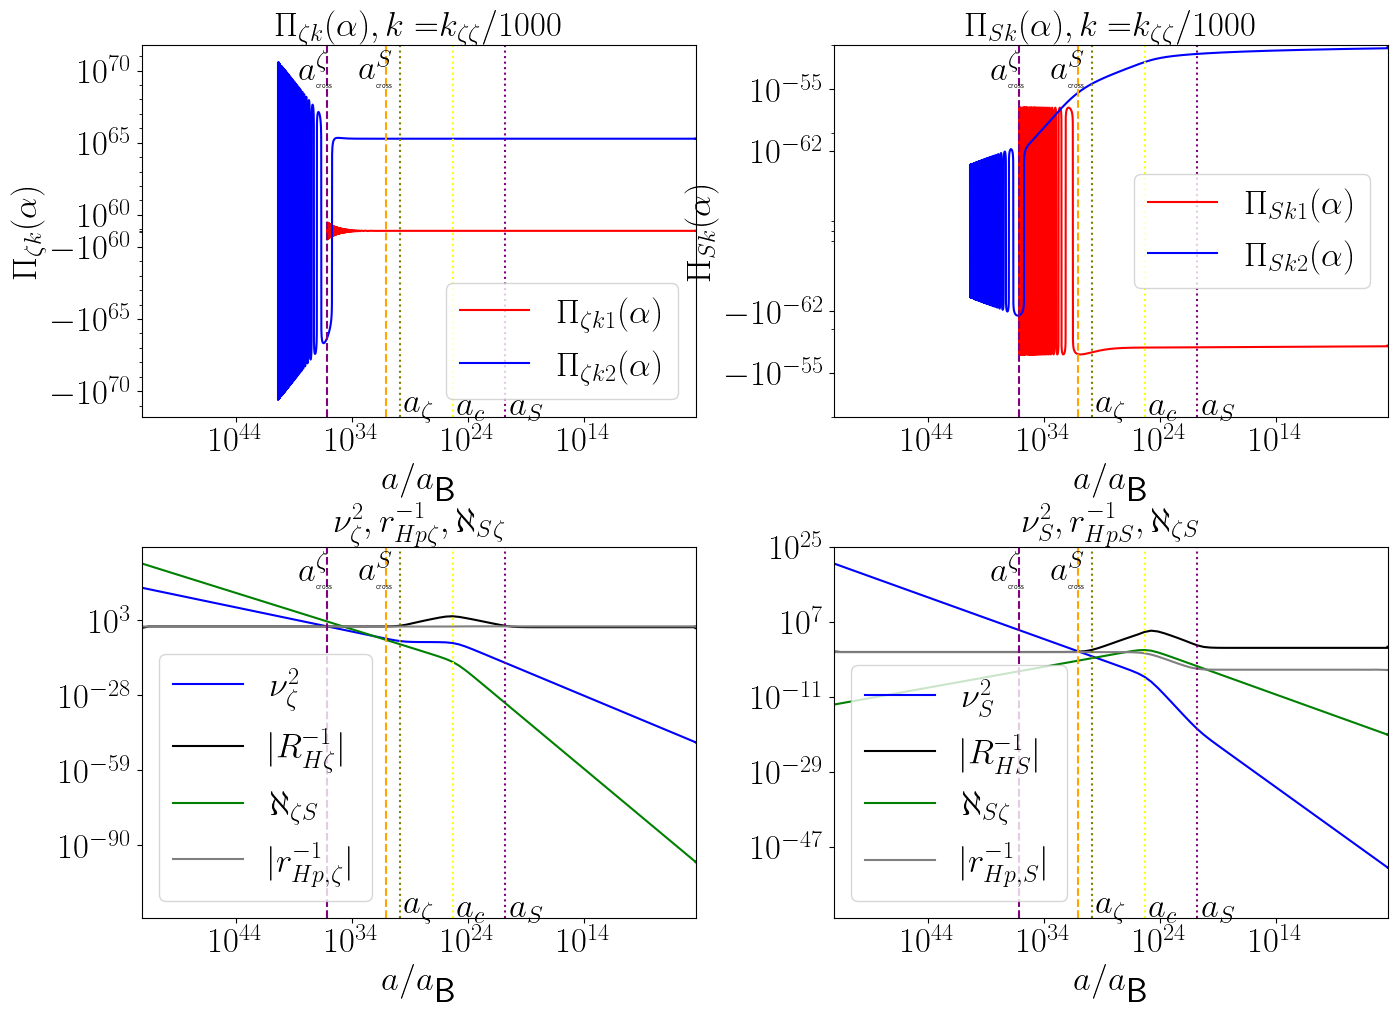

kζζ < k < kc
-------------------------------------------------------------------------------------------------------------------------------------------------------------


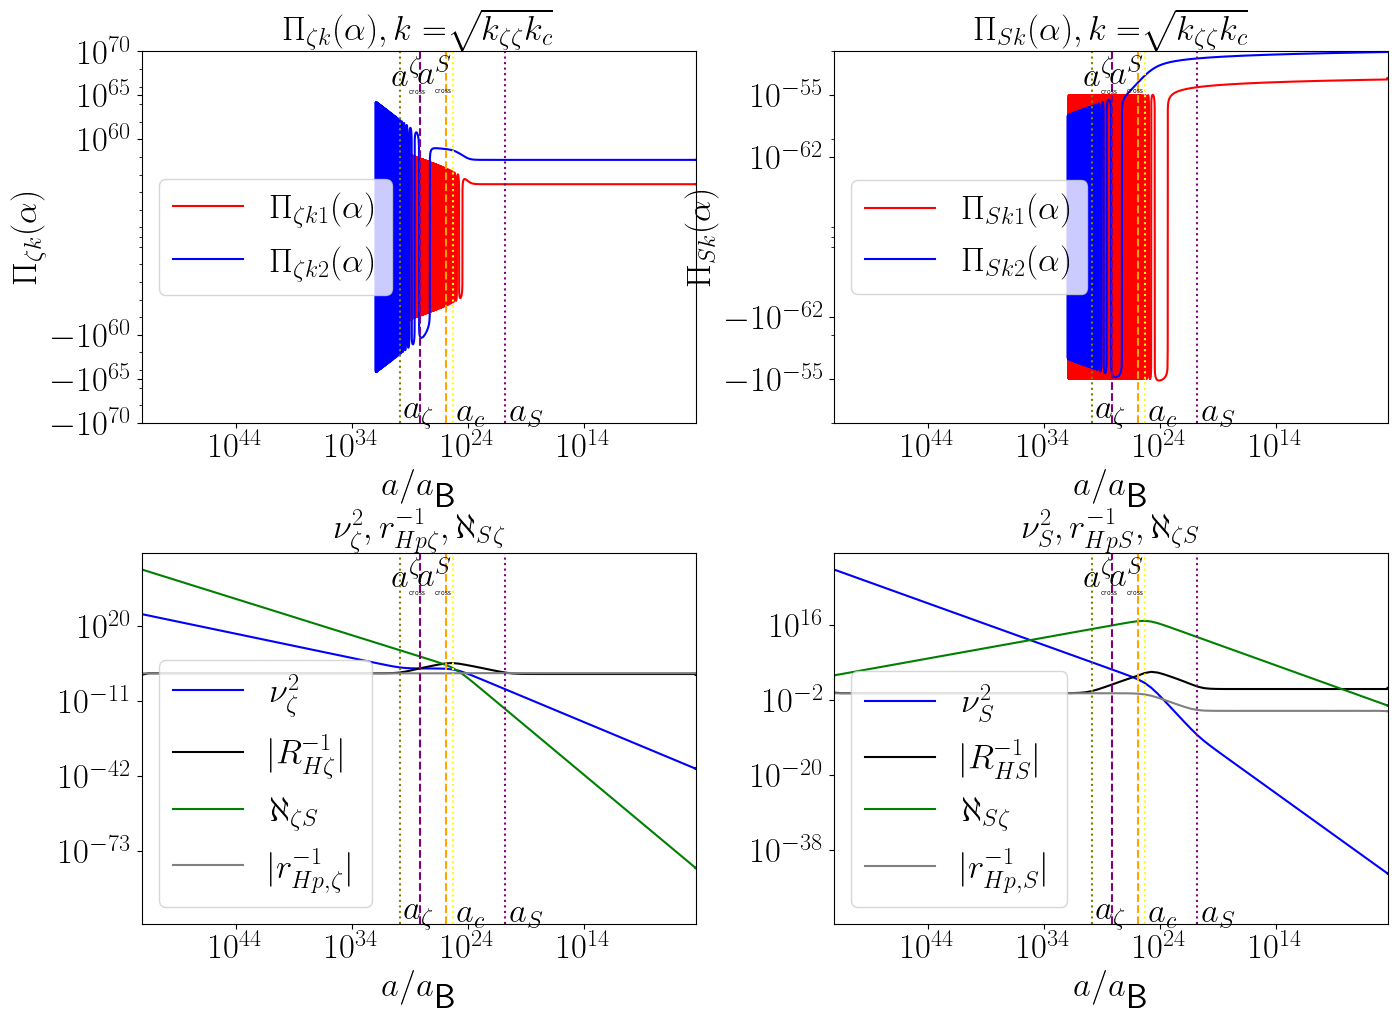


kc << k
-------------------------------------------------------------------------------------------------------------------------------------------------------------


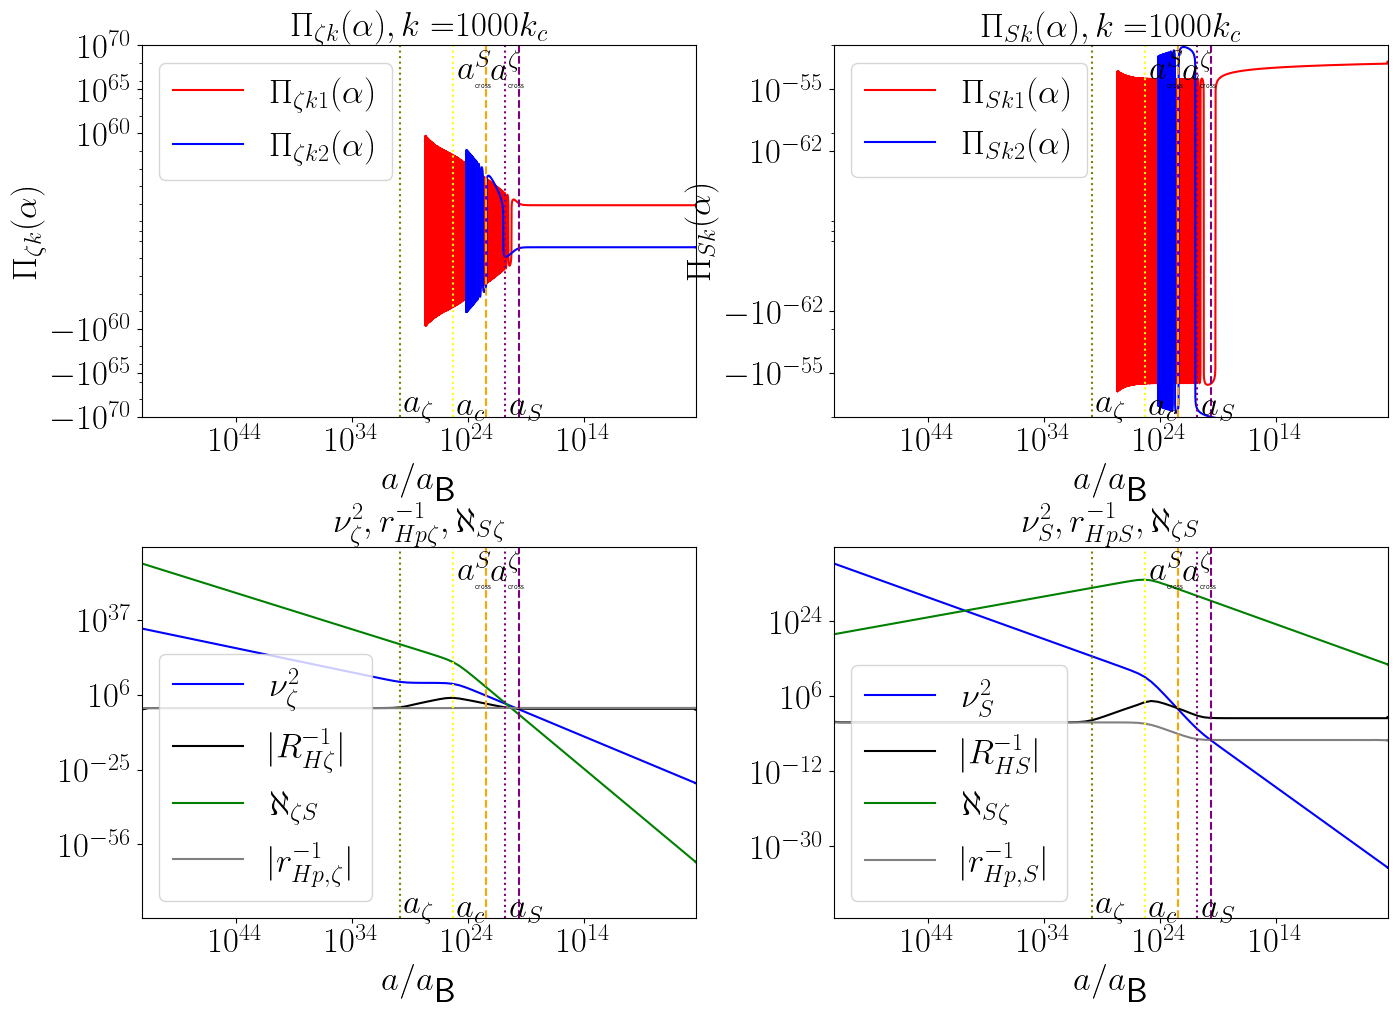

CPU times: user 7.18 s, sys: 81.6 ms, total: 7.26 s
Wall time: 7.64 s


In [ ]:
%%time

change_size()

# figure parameters
r = 2   # number of rows
c = 2   # number of columns

# defines a for loop to plot the coordinate modes {Πζkℓ,ΠSkℓ} for each value of k
for j in range(len(k_list)):
  k = k_list[j]  # sets k to be equal to each value of the k_list per iteration

  # prints the respective k interval
  if j==0:
    k_text = r'k << kζζ'
    k_val_text = r'$k_{\zeta\zeta}/1000$'
    k_name = 'pk_dust'
  if j==1:
    k_text = 'kζζ < k < kc'
    k_val_text = r'$\sqrt{k_{\zeta\zeta}k_{c}}$'
    k_name = 'pk_trans'
  if j==2:
    print()
    k_text = 'kc << k'
    k_val_text = r'$1000k_{c}$'
    k_name = 'pk_rad'
  print(k_text)

  # Defines one r x c figure per value of k
  fig, ax = plt.subplots(r,c, figsize=(14, 10))                                               # sets the size of the figure
  fig.tight_layout()                                                                          # sets the size of each plot within the figure
  fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.25, hspace=0.35)   # sets the space between each plot

  # Defining the modes
  init1 = mode1_list[j]         # defines a variable associated to the modes of Initial Condition 1 per each value of k
  init2 = mode2_list[j]         # defines a variable associated to the modes of Initial Condition 2 per each value of k
  twofluid_k = model_list[j]    # defines a variable associated to the models per each value of k

  # Plots the Adiabatic Modes
  ax[0,0].plot(a(init1.t)/aB, init1.pz_r() , label = r'$\Pi_{\zeta k1}(\alpha)$', color='red')    # plots Πζk1, the momentum of the adiabatic mode associated to Initial Condition 1
  ax[0,0].plot(a(init2.t)/aB, init2.pz_r(), label = r'$\Pi_{\zeta k2}(\alpha)$' , color='blue')   # plots Πζk2, the momentum of the adiabatic mode associated to Initial Condition 2

  # Plots the Entropy Modes
  ax[0,1].plot(a(init1.t)/aB, init1.ps_r() , label=r'$\Pi_{Sk1}(\alpha)$', color='red')           # plots ΠSk1, the momentum of the entropy mode associated to Initial Condition 1
  ax[0,1].plot(a(init2.t)/aB, init2.ps_r() , label=r'$\Pi_{Sk2}(\alpha)$', color='blue')          # plots ΠSk2, the momentum of the entropy mode associated to Initial Condition 2

  # Adiabatic Effective Couplings
  ax[1,0].plot(a_c, (twofluid_k.nuz ** 2), label = r'$\nu^{2}_{\zeta}$', color='blue')                    # plots νζ², the frequency squared  of the adiabatic modes
  ax[1,0].plot(a_c, np.abs(twofluid_k.Rh_z), label=r'$|R^{-1}_{H\zeta}|$', color='black')                        # plots R⁻¹_Hζ, the inverse effective adiabatic Hubble radius
  ax[1,0].plot(a_c, np.abs(twofluid_k.aleph_sz) * (k**2), label=r'$\aleph_{\zeta S}$', color='green')     # plots ℵ_Sζ, entropy-to-adiabatic sub-Hubble coupling
  #ax[1,0].plot(alpha_c, np.abs(twofluid_k.beth_zs), label=r'$\beta_{\zeta S}$', color='orange')              # plots ℶ_ζS, adiabatic-to-entropy super-Hubble coupling
  # the next line plots r⁻¹Hpζ, the inverse effective Hubble radius of the adiabatic momentum mode
  ax[1,0].plot(a_c, np.abs( np.gradient( np.log( twofluid_k.mnu2_z / (k**2) ) , alpha_c) ) , label=r'$|r^{-1}_{Hp,\zeta}|$', color='grey')
  #ax[1,0].plot(alpha_c, twofluid_k.wz, label=r'$\omega^{2}_{\zeta}$', color='pink')                          # plots the ωζ, the frequency of the adiabatic Mukhanov-Sasaki variable

  # Entropy Effective Couplings
  ax[1,1].plot(a_c, (twofluid_k.nus ** 2), label = r'$\nu^{2}_{S}$', color='blue')                        # plots the frequency squared νS² of the entropy modes
  ax[1,1].plot(a_c, np.abs( twofluid_k.Rh_s ), label=r'$|R^{-1}_{H S}|$', color='black')                         # plots R⁻¹_HS, the inverse effective adiabatic Hubble radius
  ax[1,1].plot(a_c, np.abs(twofluid_k.aleph_zs) * (k**2), label=r'$\aleph_{S\zeta}$', color='green')      # plots ℵ_ζS, adiabatic-to-entropy sub-Hubble coupling
  #ax[1,1].plot(alpha_c, np.abs(twofluid_k.beth_sz), label=r'$\beta_{S\zeta}$', color='orange')               # plots ℶ_Sζ, entropy-to-adiabatic super-Hubble coupling
  # the next line plots r⁻¹HpS, the inverse effective Hubble radius of the entropy momentum mode
  ax[1,1].plot(a_c, np.abs( np.gradient( np.log( twofluid_k.mnu2_s / (k**2) ) , alpha_c) ) , label=r'$|r^{-1}_{Hp,S}|$', color='grey')
  #ax[1,1].plot(alpha_c, twofluid_k.ws, label=r'$\omega^{2}_{S}$', color='brown')                             # plots the ωS, the frequency of the entropy Mukhanov-Sasaki variable

  ##################################################################################################################################################################################################

  # Legends

  # Titles
  ax[0,0].set_title(r'$\Pi_{\zeta k}(\alpha)$' + "$, k =$" + k_val_text )                           # sets the legend of the adiabatic modes plot
  ax[0,1].set_title(r'$\Pi_{Sk}(\alpha)$' + "$, k =$" + k_val_text)                                 # sets the legend of the entropy modes plot
  ax[1,0].set_title(r'$\nu^{2}_{\zeta}, r^{-1}_{Hp\zeta}, \aleph_{S\zeta}$')                     # sets the legend of the adiabatic effective couplings plot
  ax[1,1].set_title(r'$\nu^{2}_{S}, r^{-1}_{HpS}, \aleph_{\zeta S}$')                              # sets the legend of the entropy effective couplings plot

  ax[0,0].set_ylabel(r'$\Pi_{\zeta k}(\alpha)$')    # sets a label to the y axis of the norm of adiabatic modes plot for Initial Condition 1
  ax[0,1].set_ylabel(r'$\Pi_{Sk}(\alpha)$')         # sets a label to the y axis of the norm of entropy modes plot for Initial Condition 1

  if j==0:
    n_ticks = 3
    ax[0,0].set_yscale('symlog', linthresh=1e60)     # sets a log scale that allows negative values for the mode plots
    ax[0][0].set_yticks( list( np.geomspace( -1e60, -1e70, n_ticks ) ) + list( np.geomspace( 1e60, 1e70, n_ticks ) ) )
    ax[0,1].set_yscale('symlog', linthresh=1e-70)     # sets a log scale that allows negative values for the mode plots
    ax[0][1].set_yticks( list( np.geomspace( -1e-62, -10**int(np.log10( np.abs(ax[0][1].set_ylim()[-1] ) )), n_ticks ) ) + list( np.geomspace( 1e-62, 10**int(np.log10( np.abs(ax[0][1].set_ylim()[-1] ) )), n_ticks ) ) )

  if j==1:
    n_ticks = 3
    ax[0,0].set_yscale('symlog', linthresh=1e50)     # sets a log scale that allows negative values for the mode plots
    ax[0][0].set_yticks( list( np.geomspace( -1e60, -1e70, n_ticks ) ) + list( np.geomspace( 1e60, 1e70, n_ticks ) ) )
    ax[0,1].set_yscale('symlog', linthresh=1e-70)     # sets a log scale that allows negative values for the mode plots
    ax[0][1].set_yticks( list( np.geomspace( -1e-62, -10**int(np.log10( np.abs(ax[0][1].set_ylim()[-1] ) )), n_ticks ) ) + list( np.geomspace( 1e-62, 10**int(np.log10( np.abs(ax[0][1].set_ylim()[-1] ) )), n_ticks ) ) )

  if j==2:
    n_ticks = 3
    ax[0,0].set_yscale('symlog', linthresh=1e50)     # sets a log scale that allows negative values for the mode plots
    ax[0][0].set_yticks( list( np.geomspace( -1e60, -1e70, n_ticks ) ) + list( np.geomspace( 1e60, 1e70, n_ticks ) ) )
    ax[0,1].set_yscale('symlog', linthresh=1e-70)     # sets a log scale that allows negative values for the mode plots
    ax[0][1].set_yticks( list( np.geomspace( -1e-62, -10**int(np.log10( np.abs(ax[0][1].set_ylim()[-1] ) )), n_ticks ) ) + list( np.geomspace( 1e-62, 10**int(np.log10( np.abs(ax[0][1].set_ylim()[-1] ) )), n_ticks ) ) )


  # creates loops to iterate over each graph
  for i in range(r):                                      # iterates over each row
    for j in range(c):                                    # iterates over each column
      ax[i,j].set_xscale('log')                           # sets the x scale to log
      ax[i,j].set_xlim(a_c[0],a_c[-1])                    # sets the x limits

      # Characteristic Transition Times
      #ax[i,j].axvline(x = az, color='olive', linestyle=':', label=r'$\alpha_{\zeta} \iff \phi_{\zeta}$')                  # plots αζ, the characteristic time instant for which the speed of sound of the adiabatic mode starts to vary
      #ax[i,j].axvline(x = aS, color='purple', linestyle=':', label=r'$\alpha_{S} \iff \phi_{S}$')                         # plots αS, the characteristic time instant for which the speed of sound of the entropy mode starts to vary
      #ax[i,j].axvline(x = ac, color='yellow', linestyle=':', label=r'$\alpha_{\hbox{crit}} \iff \phi = \frac{\pi}{4}$')   # plots αc, the transition time instant

      # Horizon Crossing Times of each mode
      #ax[i,j].axvline(x = a(twofluid_k.cross_z(k))/aB, color='purple', linestyle='--', label=r'$\alpha^{\zeta}_{ cross }$ = ' + f"{twofluid_k.cross_z(k):.2e}" ) # plots the time for which the adiabatic mode frequency coincides with its effective Hubble radius
      #ax[i,j].axvline(x = a(twofluid_k.cross_s(k))/aB, color='orange', linestyle='--', label=r'$\alpha^{S}_{ cross }$ = ' + f"{twofluid_k.cross_s(k):.2e}" )     # plots the time for which the entropy mode frequency coincides with its effective Hubble radius
      #ax[i,j].axvline(x = 0, color='black', linestyle=':', label=r'$\alpha = \alpha_{B} = 0$' )

      # Characteristic Transition Times
      ax[i,j].axvline(x = az/aB, color='olive', linestyle=':')                  # plots aζ, the characteristic time instant for which the speed of sound of the adiabatic mode starts to vary
      ax[i,j].axvline(x = aS/aB, color='purple', linestyle=':')                 # plots aS, the characteristic time instant for which the speed of sound of the entropy mode starts to vary
      ax[i,j].axvline(x = ac/aB, color='yellow', linestyle=':')                 # plots ac, the transition time instant

      # Horizon Crossing Times of each mode
      ax[i,j].axvline(x = a(twofluid_k.cross_z(k))/aB, color='purple', linestyle='--'  )          # plots the time for which the adiabatic mode frequency coincides with its effective Hubble radius
      ax[i,j].axvline(x = a(twofluid_k.cross_s(k))/aB, color='orange', linestyle='--' )           # plots the time for which the entropy mode frequency coincides with its effective Hubble radius
      #ax[i,j].axvline(x = 0, color='black', linestyle=':', label=r'$\alpha = \alpha_{B} = 0$' )


      # Sets the y scales
      if i == 0:
        #ax[i,j].set_yscale('symlog', linthresh = 1e-58)     # sets a log scale that allows negative values for the mode plots
        ax[i,j].legend(loc = 'best')                # prints the legend sets the legend font size
      else:
        ax[i,j].set_yscale('log')                         # sets a log scale for the effective couplings plots
        ax[i,j].legend(loc = 'best')                # prints the legend sets the legend font size                                                   # plots the bouncing time instant

      # Labels
      ax[i,j].set_xlabel(r'$a/a_{\hbox{B}}$')    # sets a label to x axis as time
      #ax[i,j].legend()                   # prints the legend

    # Annotations

      # critical scale factors
      x0, y0 = 3, 18
      factor = 1
      ax[i,j].annotate(r'$a_{c}$', xy=(ac/aB, ax[i,j].set_ylim()[0] * factor), xycoords='data',
              xytext=(x0, y0), textcoords='offset points', color='black', verticalalignment='top')
      ax[i,j].annotate(r'$a_{\zeta}$', xy=(az/aB, ax[i,j].set_ylim()[0] * factor), xycoords='data',
                    xytext=(x0, y0), textcoords='offset points', color='black', verticalalignment='top')
      ax[i,j].annotate(r'$a_{S}$', xy=(aS/aB, ax[i,j].set_ylim()[0] * factor), xycoords='data',
                   xytext=(x0, y0), textcoords='offset points', color='black', verticalalignment='top')

      # Hubble crossing times
      x0, y0 = -20, -3
      factor = 1
      ax[i,j].annotate(r'$a^{\zeta}_{\hbox{\tiny cross }}$', xy=(a(twofluid_k.cross_z(k))/aB, ax[i,j].set_ylim()[-1] * factor), xycoords='data',
                    xytext=(x0, y0), textcoords='offset points', color='black', verticalalignment='top')
      ax[i,j].annotate(r'$a^{S}_{\hbox{\tiny cross}}$ ', xy=(a(twofluid_k.cross_s(k))/aB, ax[i,j].set_ylim()[-1] * factor), xycoords='data',
                    xytext=(x0, y0), textcoords='offset points', color='black', verticalalignment='top')
      #ax[i,j].annotate(r'$\alpha = 0$ ', xy=(0, ax[i,j].set_ylim()[0] * factor), xycoords='data',
      #              xytext=(x0, y0), textcoords='offset points', color='black', verticalalignment='top')
      ax[0,1].set_ylim(-1e-50, 1e-50)

  #print('k ~ '+str(f"{k:.2e}"))          # prints the value of k for each mode

  # a separator between each plot
  print('-------------------------------------------------------------------------------------------------------------------------------------------------------------')

###############################################################################################################################

  # shows the figure per each mode
  plt.savefig(f"graphs/"+k_name+".pdf", bbox_inches="tight")       # saves the figure
  plt.show()

In the above graphs, one notes a similar behavior for the momentum modes $\Pi_{\ell k}$ in comparison to the coordinate modes: an initial oscillatory (sub-Hubble) regime followed by a "frozen" (super-Hubble) regime. The main differences are that, while adiabatic modes were amplified, all momenta modes have constant amplitudes in the deep super-Hubble limit, as already discussed using the zeroth order super-Hubble expansion:

\begin{align}
  \Pi_{\zeta k}(\alpha) & \approx p_{z}(k)\, , \\
  \Pi_{Sk}(\alpha) & \approx p_{S}(k)\, .
\end{align}

The other main difference is that, while horizon crossing was analyzed by comparing the frequencies $\nu_{\ell}$ with the effective Hubble radiuses $R^{-1}_{H\ell}$, the sub-Hubble to super-Hubble transition for momenta modes must be compared with their effective momenta Hubble radiuses $r^{-1}_{Hp\ell}$. However, the horizon crossing time for momenta modes coincides with coordinate modes for $\alpha < \alpha_{\zeta}$, that is, before the dust-to-radiation transition, where the $Y$ coupling is very small and the coordinate and momenta effective Hubble radiuses coincide.

We now turn to analyze the effect between $\color{red}{\text{Initial Condition 1}}$ and $\color{blue}{\text{Initial Condition 2}}$ for the momenta modes.

k << kζζ
-------------------------------------------------------------------------------------------------------------------------------------------------------------


<timed exec>:143: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.


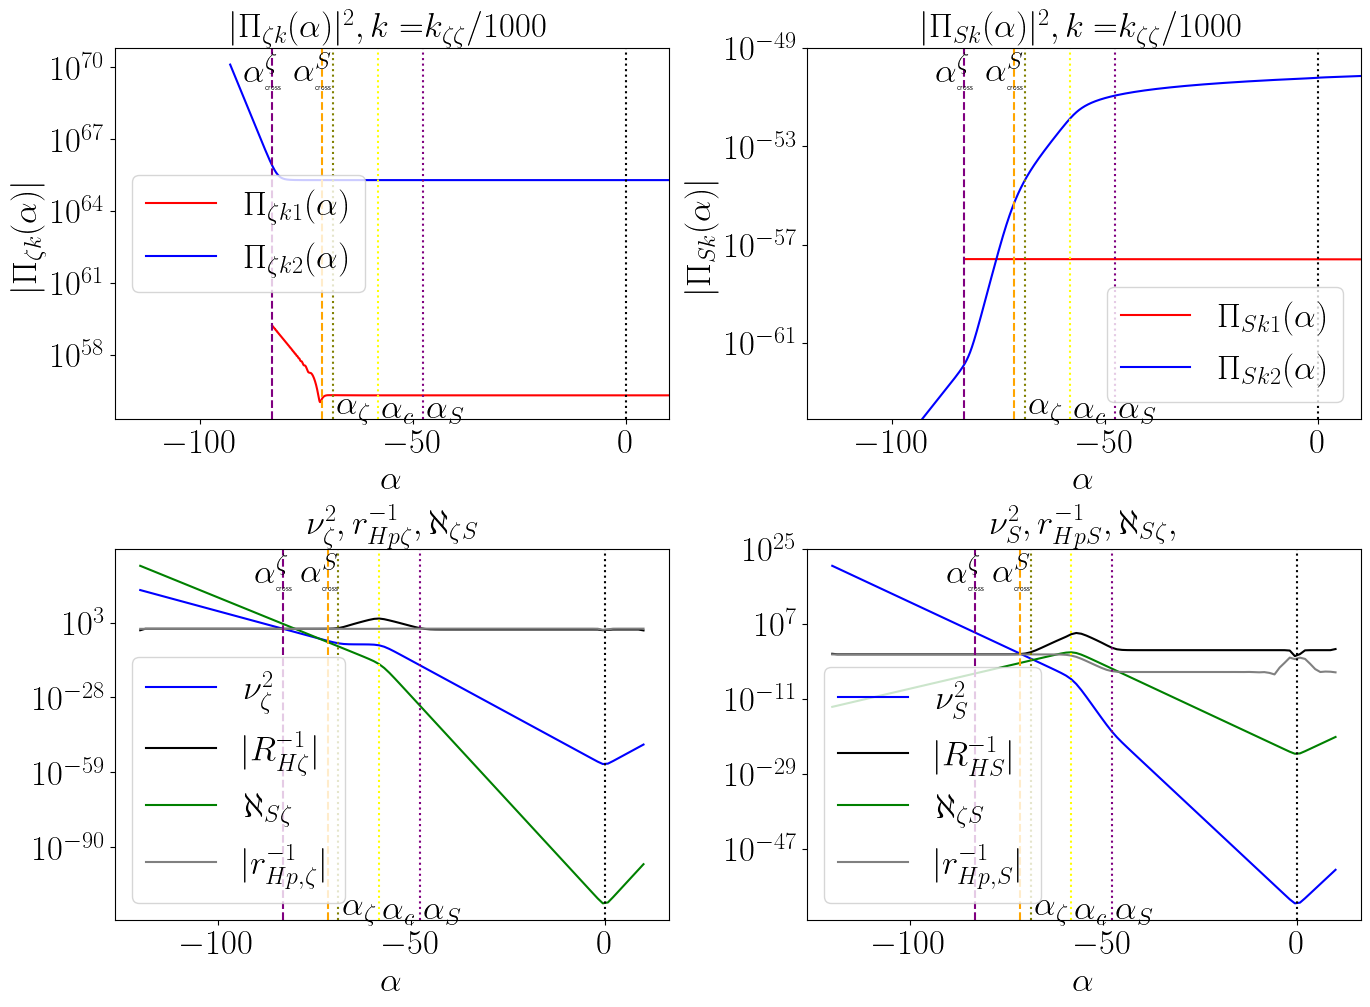

kζζ < k < kc
-------------------------------------------------------------------------------------------------------------------------------------------------------------


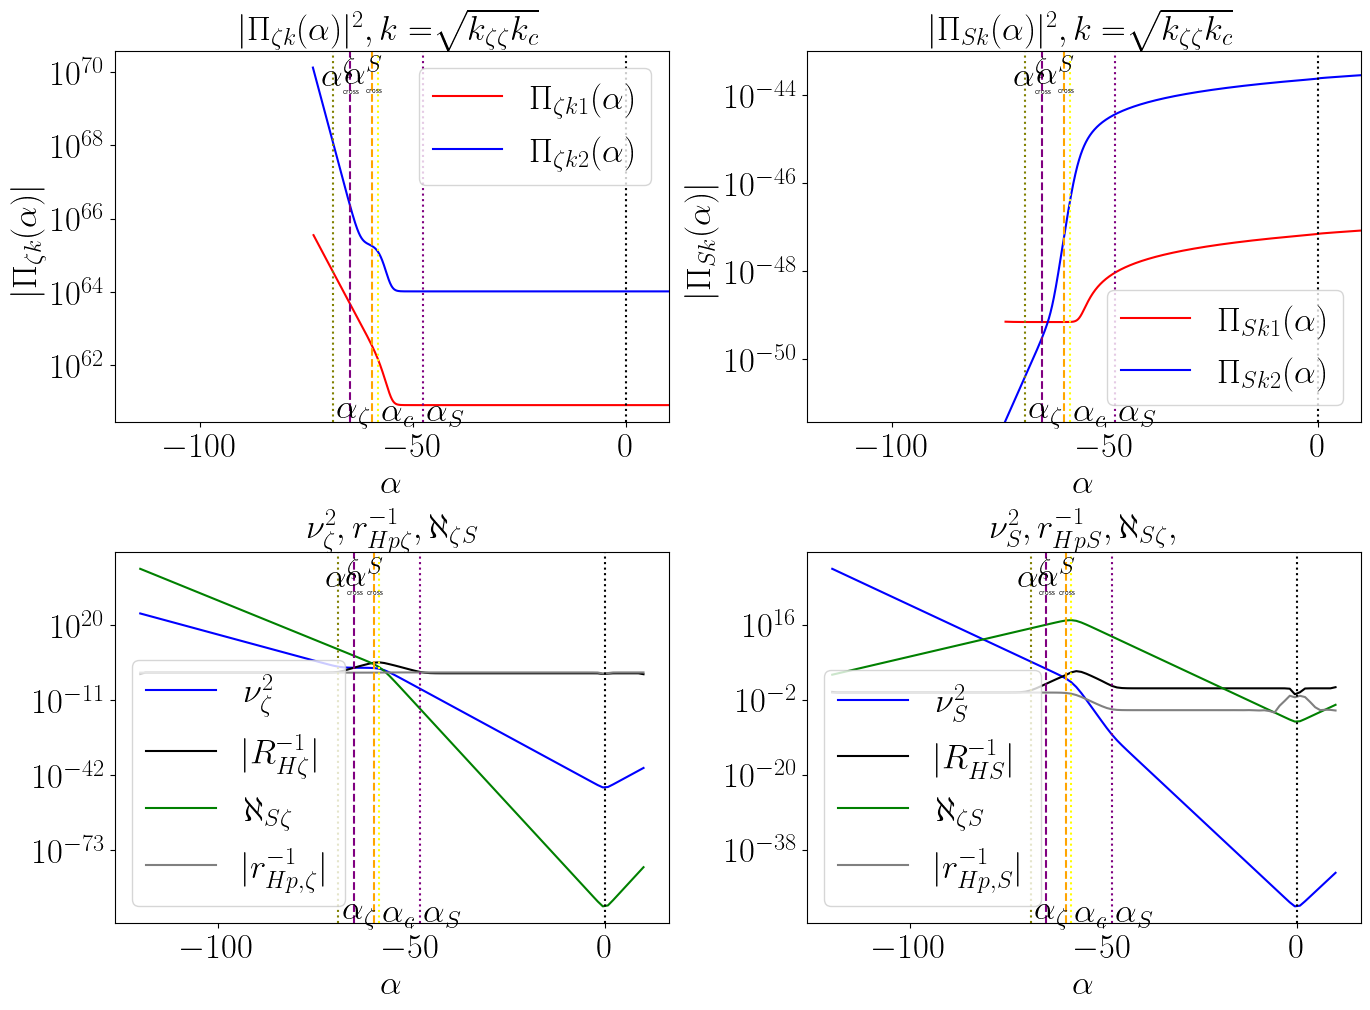


kc << k
-------------------------------------------------------------------------------------------------------------------------------------------------------------


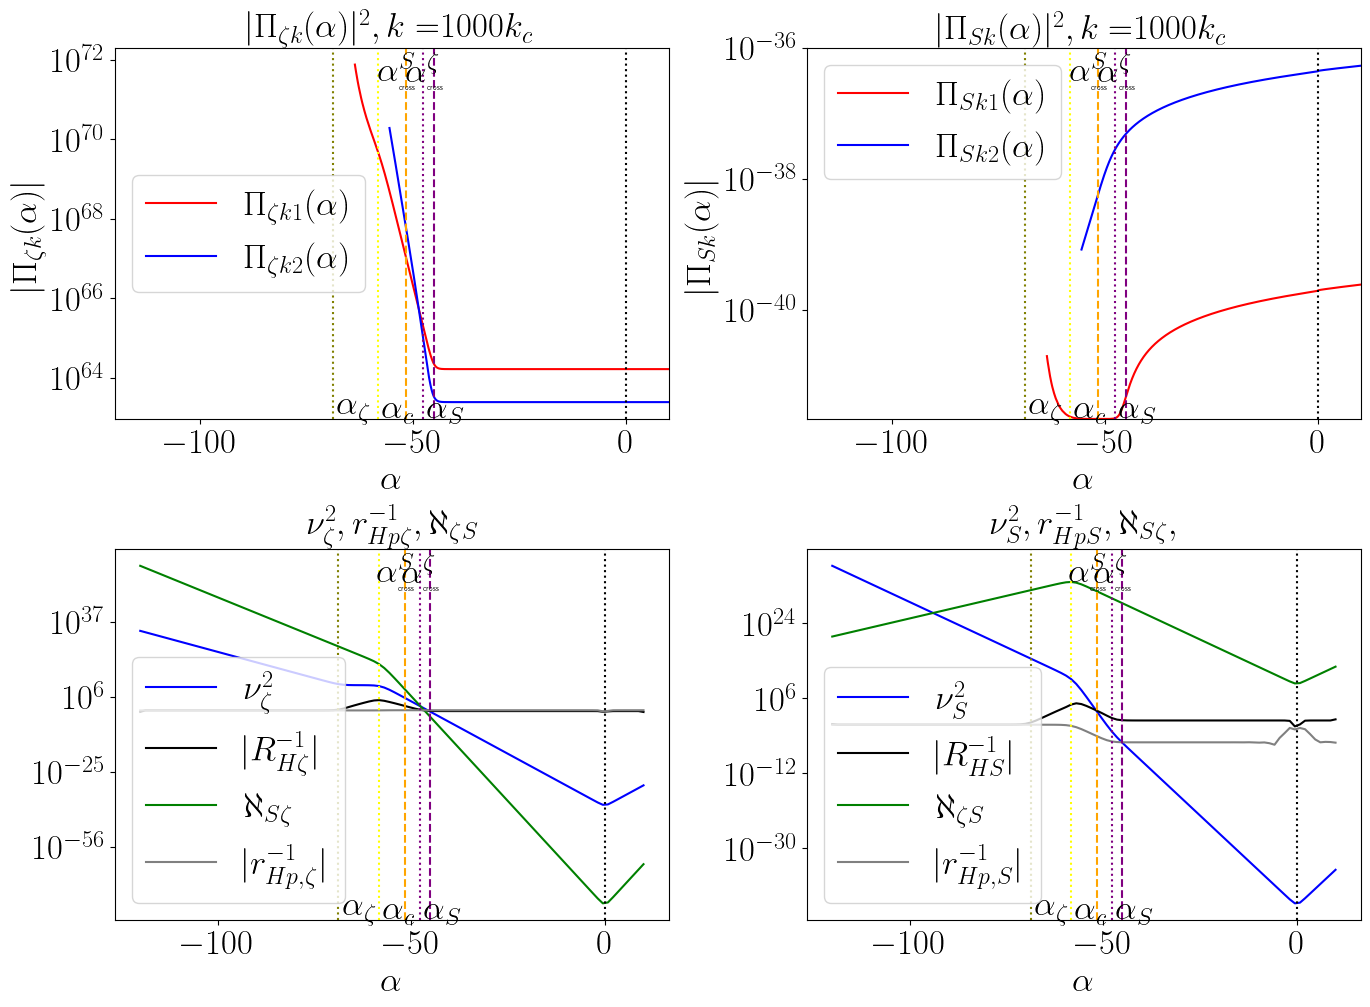

CPU times: user 5.81 s, sys: 82.5 ms, total: 5.9 s
Wall time: 6.25 s


In [ ]:
%%time

change_size()

# Norm evolution

# defines a for loop to plot the norm of the coordinate modes, {|Πζkℓ|,|ΠSkℓ|} for each value of k
for j in range(len(k_list)):
  k = k_list[j] # sets k to be equal to each value of the k_list per iteration

  # prints the respective k interval
  if j==0:
    k_text = r'k << kζζ'
    k_val_text = r'$k_{\zeta\zeta}/1000$'
    k_name = 'pk_dust_norm'
  if j==1:
    k_text = 'kζζ < k < kc'
    k_val_text = r'$\sqrt{k_{\zeta\zeta}k_{c}}$'
    k_name = 'pk_trans_norm'
  if j==2:
    print()
    k_text = 'kc << k'
    k_val_text = r'$1000k_{c}$'
    k_name = 'pk_rad_norm'
  print(k_text)

  r = 2   # number of rows
  c = 2   # number of columns

  # Defines one r x c figure per value of k
  fig, ax = plt.subplots(r,c, figsize=(14, 10))                                               # sets the size of the figure
  fig.tight_layout()                                                                          # sets the size of each plot within the figure
  fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.25, hspace=0.35)   # sets the space between each plot

  # Defining the modes
  init1 = mode1_list[j]         # defines a variable associated to the modes of Initial Condition 1 per each value of k
  init2 = mode2_list[j]         # defines a variable associated to the modes of Initial Condition 2 per each value of k
  twofluid_k = model_list[j]    # defines a variable associated to the models per each value of k

  # Plots the Norm of the Adiabatic Modes
  ax[0,0].plot(init1.t, np.sqrt( k**3 * (init1.pz_r()**2 + init1.pz_im()**2 ) ) , label=r'$\Pi_{\zeta k1}(\alpha)$', color='red')    # plots |Πζk1|, the norm of the adiabatic momentum mode associated to Initial Condition 1
  ax[0,0].plot(init2.t, np.sqrt( k**3 * (init2.pz_r()**2 + init2.pz_im()**2 ) ), label=r'$\Pi_{\zeta k2}(\alpha)$', color='blue')     # plots |Πζk2|, the norm of the adiabatic momentum mode associated to Initial Condition 2

  # Plots the Norm of the Entropy Modes
  ax[0,1].plot(init1.t, np.sqrt( k**3 * (init1.ps_r()**2 + init1.ps_im()**2 ) ), label=r'$\Pi_{Sk1}(\alpha)$', color='red')          # plots |ΠSk1|, the norm of the entropy mode associated to Initial Condition 1
  ax[0,1].plot(init2.t, np.sqrt( k**3 * (init2.ps_r()**2 + init2.ps_im()**2 ) ), label=r'$\Pi_{Sk2}(\alpha)$', color='blue')         # plots |ΠSk2|, the the norm of the entropy mode associated to Initial Condition 2

  # Adiabatic Effective Couplings
  ax[1,0].plot(alpha_c, (twofluid_k.nuz ** 2), label = r'$\nu^{2}_{\zeta}$', color='blue')                    # plots νζ², the frequency squared  of the adiabatic modes
  ax[1,0].plot(alpha_c, np.abs(twofluid_k.Rh_z), label=r'$|R^{-1}_{H\zeta}|$', color='black')                       # plots R⁻¹_Hζ, the inverse effective adiabatic Hubble radius
  ax[1,0].plot(alpha_c, np.abs(twofluid_k.aleph_sz) * (k**2), label=r'$\aleph_{S\zeta}$', color='green')      # plots ℵ_ζS, adiabatic-to-entropy sub-Hubble coupling
  #ax[1,0].plot(alpha_c, np.abs(twofluid_k.beth_zs), label=r'$\beth_{\zeta S}$', color='orange')              # plots ℶ_ζS, adiabatic-to-entropy super-Hubble coupling
  #ax[1,0].plot(alpha_c, twofluid_k.wz, label=r'$\omega^{2}_{\zeta}$', color='pink')                          # plots the ωζ, the frequency of the adiabatic Mukhanov-Sasaki variable
  ax[1,0].plot(alpha_c, np.abs( np.gradient( np.log( twofluid_k.mnu2_z / (k**2) ) , alpha_c) ) , label=r'$|r^{-1}_{Hp,\zeta}|$', color='grey')

  # Entropy Effective Couplings
  ax[1,1].plot(alpha_c, (twofluid_k.nus ** 2), label = r'$\nu^{2}_{S}$', color='blue')                        # plots the frequency squared νS² of the entropy modes
  ax[1,1].plot(alpha_c, np.abs( twofluid_k.Rh_s ), label=r'$|R^{-1}_{H S}|$', color='black')                        # plots R⁻¹_HS, the inverse effective adiabatic Hubble radius
  ax[1,1].plot(alpha_c, np.abs(twofluid_k.aleph_zs) * (k**2), label=r'$\aleph_{\zeta S}$', color='green')     # plots ℵ_Sζ, entropy-to-adiabatic sub-Hubble coupling
  #ax[1,1].plot(alpha_c, np.abs(twofluid_k.beth_sz), label=r'$\beth_{S\zeta}$', color='orange')               # plots ℶ_Sζ, entropy-to-adiabatic super-Hubble coupling
  #ax[1,1].plot(alpha_c, twofluid_k.ws, label=r'$\omega^{2}_{S}$', color='brown')                             # plots the ωS, the frequency of the entropy Mukhanov-Sasaki variable
  ax[1,1].plot(alpha_c, np.abs( np.gradient( np.log( twofluid_k.mnu2_s / (k**2) ) , alpha_c) ) , label=r'$|r^{-1}_{Hp,S}|$', color='grey')

  ##################################################################################################################################################################################################

  # Legends

  # Titles
  ax[0,0].set_title(r'$|\Pi_{\zeta k}(\alpha)|^{2}$' + "$, k =$" + k_val_text)                            # sets the legend of the norm of adiabatic modes plot
  ax[0,1].set_title(r'$|\Pi_{S k}(\alpha)|^{2}$' + "$, k =$" + k_val_text)                                # sets the legend of the norm of entropy modes plot
  ax[1,0].set_title(r'$\nu^{2}_{\zeta}, r^{-1}_{Hp\zeta}, \aleph_{\zeta S}$')                             # sets the legend of the adiabatic effective couplings plot
  ax[1,1].set_title(r'$\nu^{2}_{S}, r^{-1}_{HpS}, \aleph_{S\zeta}, $')                                    # sets the legend of the entropy effective couplings plot

  # Sets the y labels
  ax[0,0].set_ylabel(r'$|\Pi_{\zeta k}(\alpha)|$')    # sets a label to the y axis of the norm of adiabatic modes plot
  ax[0,1].set_ylabel(r'$|\Pi_{S k}(\alpha)|$')        # sets a label to the y axis of the norm of entropy modes plot

  if j==0:
    n_ticks = 3
    ax[0,0].set_yscale('symlog', linthresh=1e60)     # sets a log scale that allows negative values for the mode plots
    ax[0][0].set_yticks( list( np.geomspace( -1e60, -1e70, n_ticks ) ) + list( np.geomspace( 1e60, 1e70, n_ticks ) ) )
    ax[0,1].set_yscale('symlog', linthresh=1e-70)     # sets a log scale that allows negative values for the mode plots
    ax[0][1].set_yticks( list( np.geomspace( -1e-62, -10**int(np.log10( np.abs(ax[0][1].set_ylim()[-1] ) )), n_ticks ) ) + list( np.geomspace( 1e-62, 10**int(np.log10( np.abs(ax[0][1].set_ylim()[-1] ) )), n_ticks ) ) )

  if j==1:
    n_ticks = 3
    ax[0,0].set_yscale('symlog', linthresh=1e50)     # sets a log scale that allows negative values for the mode plots
    ax[0][0].set_yticks( list( np.geomspace( -1e60, -1e70, n_ticks ) ) + list( np.geomspace( 1e60, 1e70, n_ticks ) ) )
    ax[0,1].set_yscale('symlog', linthresh=1e-70)     # sets a log scale that allows negative values for the mode plots
    ax[0][1].set_yticks( list( np.geomspace( -1e-62, -10**int(np.log10( np.abs(ax[0][1].set_ylim()[-1] ) )), n_ticks ) ) + list( np.geomspace( 1e-62, 10**int(np.log10( np.abs(ax[0][1].set_ylim()[-1] ) )), n_ticks ) ) )

  if j==2:
    n_ticks = 3
    ax[0,0].set_yscale('symlog', linthresh=1e50)     # sets a log scale that allows negative values for the mode plots
    ax[0][0].set_yticks( list( np.geomspace( -1e60, -1e70, n_ticks ) ) + list( np.geomspace( 1e60, 1e70, n_ticks ) ) )
    ax[0,1].set_yscale('symlog', linthresh=1e-70)     # sets a log scale that allows negative values for the mode plots
    ax[0][1].set_yticks( list( np.geomspace( -1e-62, -10**int(np.log10( np.abs(ax[0][1].set_ylim()[-1] ) )), n_ticks ) ) + list( np.geomspace( 1e-62, 10**int(np.log10( np.abs(ax[0][1].set_ylim()[-1] ) )), n_ticks ) ) )


  # creates loops to iterate over each graph
  for i in range(r):                               # iterates over each row
    for j in range(c):                             # iterates over each column

      # Characteristic Transition Times
      #ax[i,j].axvline(x = tz, color='olive', linestyle=':', label=r'$\alpha_{\zeta} \iff \phi_{\zeta}$')                  # plots αζ, the characteristic time instant for which the speed of sound of the adiabatic mode starts to vary
      #ax[i,j].axvline(x = ts, color='purple', linestyle=':', label=r'$\alpha_{S} \iff \phi_{S}$')                         # plots αS, the characteristic time instant for which the speed of sound of the entropy mode starts to vary
      #ax[i,j].axvline(x = tc, color='yellow', linestyle=':', label=r'$\alpha_{\hbox{\small crit}} \iff \phi = \frac{\pi}{4}$')   # plots αc, the transition time instant

      # Horizon Crossing Times of each mode
      #ax[i,j].axvline(x = twofluid_k.cross_z(k), color='purple', linestyle='--', label=r'$\alpha_{\zeta}^{ \hbox{\small cross} }$ = ' + f"{twofluid_k.cross_z(k):.2e}" ) # plots the time for which the adiabatic mode frequency coincides with its effective Hubble radius
      #ax[i,j].axvline(x = twofluid_k.cross_s(k), color='orange', linestyle='--', label=r'$\alpha_{S}^{ \hbox{\small cross} }$ = ' + f"{twofluid_k.cross_s(k):.2e}" )     # plots the time for which the entropy mode frequency coincides with its effective Hubble radius
      #ax[i,j].axvline(x = 0, color='black', linestyle=':', label=r'$\alpha = \alpha_{B} = 0$' )                                                                          # plots the bouncing time instant

      # Characteristic Transition Times
      ax[i,j].axvline(x = tz, color='olive', linestyle=':')                  # plots αζ, the characteristic time instant for which the speed of sound of the adiabatic mode starts to vary
      ax[i,j].axvline(x = ts, color='purple', linestyle=':')                         # plots αS, the characteristic time instant for which the speed of sound of the entropy mode starts to vary
      ax[i,j].axvline(x = tc, color='yellow', linestyle=':')   # plots αc, the transition time instant

      # Horizon Crossing Times of each mode
      ax[i,j].axvline(x = twofluid_k.cross_z(k), color='purple', linestyle='--') # plots the time for which the adiabatic mode frequency coincides with its effective Hubble radius
      ax[i,j].axvline(x = twofluid_k.cross_s(k), color='orange', linestyle='--')     # plots the time for which the entropy mode frequency coincides with its effective Hubble radius
      ax[i,j].axvline(x = 0, color='black', linestyle=':' )                                                                          # plots the bouncing time instant


      # Sets the y scales
      if i < 1:
        #ax[i,j].set_yscale('symlog', linthresh=(1/k**3)**(-1/2))     # sets a log scale with a k dependent threshold
        ax[i,j].set_xlim(alpha_c[0], alpha_c[-1])                     # sets the x limits
        ax[i,j].set_yscale('log')                                     # sets the y scale to log
        ax[i,j].legend(loc="best")                             # prints the legend sets the legend font size
      else:
        ax[i,j].set_yscale('log')                                     # sets a log scale for the effective couplings plots
        ax[i,j].legend(loc="best")                              # prints the legend sets the legend font size


      # Labels
      ax[i,j].set_xlabel(r'$\alpha$')    # sets a label to x axis as time
      #ax[i,j].legend(fontsize=15)        # prints the legend sets the legend font size

      # Annotations

      # critical scale factors
      x0, y0 = 3, 18
      factor = 1
      ax[i,j].annotate(r'$\alpha_{c}$', xy=(tc, ax[i,j].set_ylim()[0] * factor), xycoords='data',
              xytext=(x0, y0), textcoords='offset points', color='black', verticalalignment='top')
      ax[i,j].annotate(r'$\alpha_{\zeta}$', xy=(tz, ax[i,j].set_ylim()[0] * factor), xycoords='data',
                    xytext=(x0, y0), textcoords='offset points', color='black', verticalalignment='top')
      ax[i,j].annotate(r'$\alpha_{S}$', xy=(ts, ax[i,j].set_ylim()[0] * factor), xycoords='data',
                   xytext=(x0, y0), textcoords='offset points', color='black', verticalalignment='top')

      # Hubble crossing times
      x0, y0 = -20, -3
      if [i,j] == [0,0]:
        factor = 0
      factor = 1
      ax[i,j].annotate(r'$\alpha^{\zeta}_{\hbox{\tiny cross }}$', xy=(twofluid_k.cross_z(k), ax[i,j].set_ylim()[-1] * factor), xycoords='data',
                    xytext=(x0, y0), textcoords='offset points', color='black', verticalalignment='top')
      ax[i,j].annotate(r'$\alpha^{S}_{\hbox{\tiny cross}}$ ', xy=(twofluid_k.cross_s(k), ax[i,j].set_ylim()[-1] * factor), xycoords='data',
                    xytext=(x0, y0), textcoords='offset points', color='black', verticalalignment='top')
      #ax[i,j].annotate(r'$\alpha = 0$ ', xy=(0, ax[i,j].set_ylim()[0] * factor), xycoords='data',
      #              xytext=(x0, y0), textcoords='offset points', color='black', verticalalignment='top')



  #print('k ~ '+str(f"{k:.2e}"))     # prints the value of k for each mode

  # a separator between each plot
  print('-------------------------------------------------------------------------------------------------------------------------------------------------------------')

###############################################################################################################################

  # shows the figure per each mode
  plt.savefig(f"graphs/"+k_name+".pdf", bbox_inches="tight")       # saves the figure
  plt.show()

The above plot shows that, as for the coordinate modes, the $\require{xcolor} \color{red}{\text{Initial Condition 1}}$ has a smaller norm than  $\require{xcolor} \color{blue}{\text{Initial Condition 2}}$, that is

\begin{align}\require{xcolor}
  \color{blue}{|\Pi_{\zeta 2}|^{2}} & > \color{red}{|\Pi_{\zeta 1}|^{2}} \, , \\
  %
  \color{blue}{|\Pi_{S2}|^{2}} & > \color{red}{|\Pi_{S2}|^{2}} \, .
\end{align}

which holds for $k < k_{c}$. At the critical value $k_{c}$, we get $\require{xcolor} \color{blue}{|\Pi_{\zeta 2}|^{2}} \approx \color{red}{|\Pi_{\zeta 1}|^{2}}$, with a reversed behavior for $k > k_{c}$.

We now turn to plot the norms times a factor of $k^{3}$, that is $k^{3}|\Pi_{\zeta k}|^{2}, k^{3}|\Pi_{Sk}|^{2}$, for close values of $k$. This will in turn reveal more information about the power spectrum, namely its tilt.

k << kζζ
-------------------------------------------------------------------------------------------------------------------------------------------------------------


<Figure size 340.39x210.373 with 0 Axes>

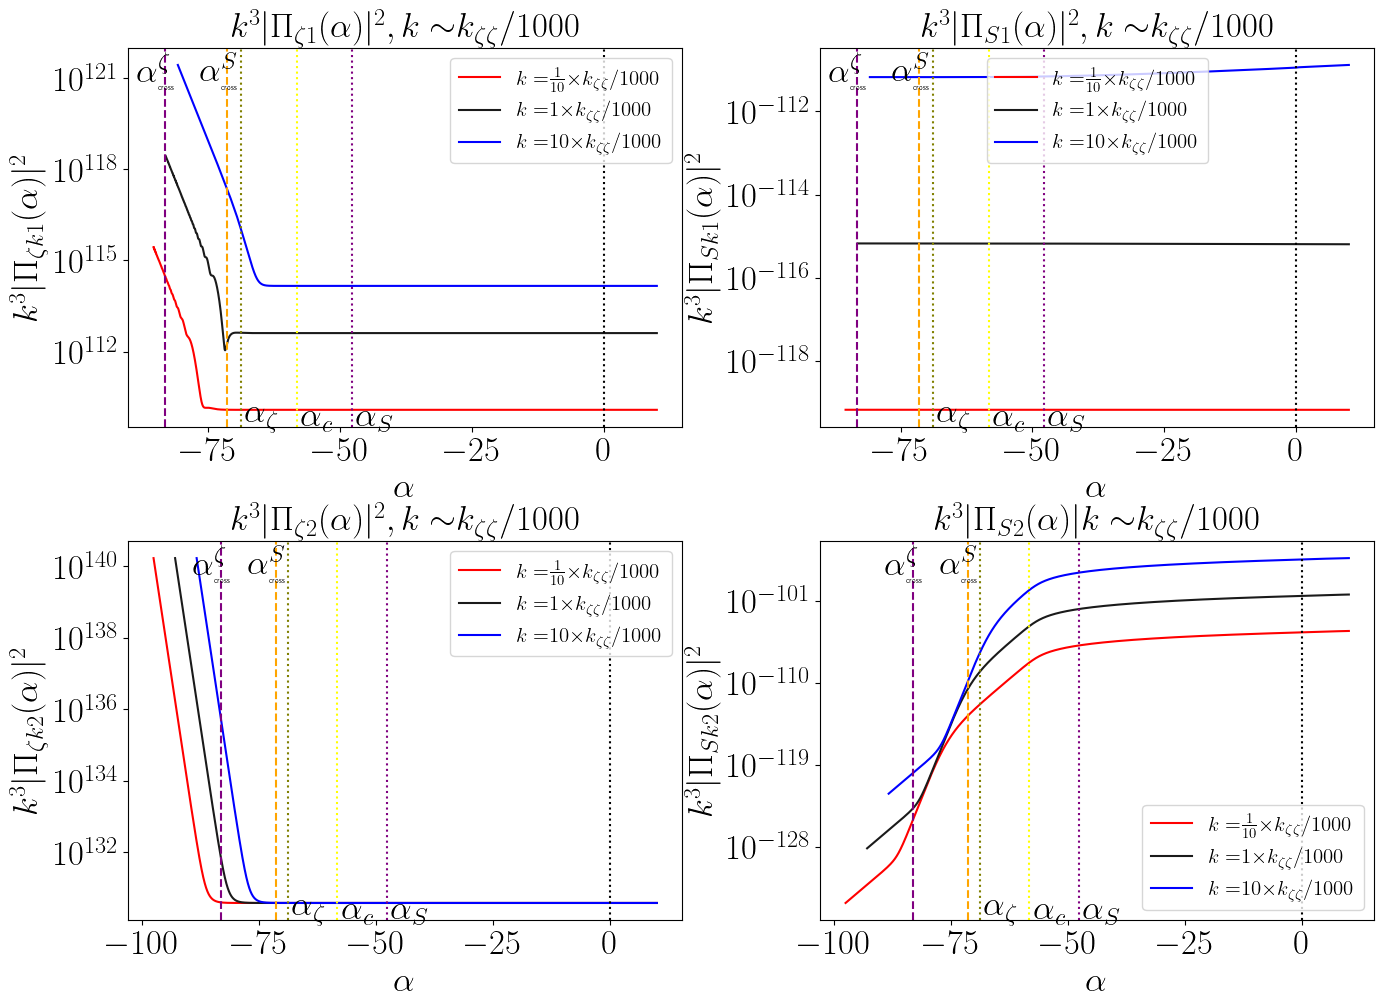

kζζ < k < kc
-------------------------------------------------------------------------------------------------------------------------------------------------------------


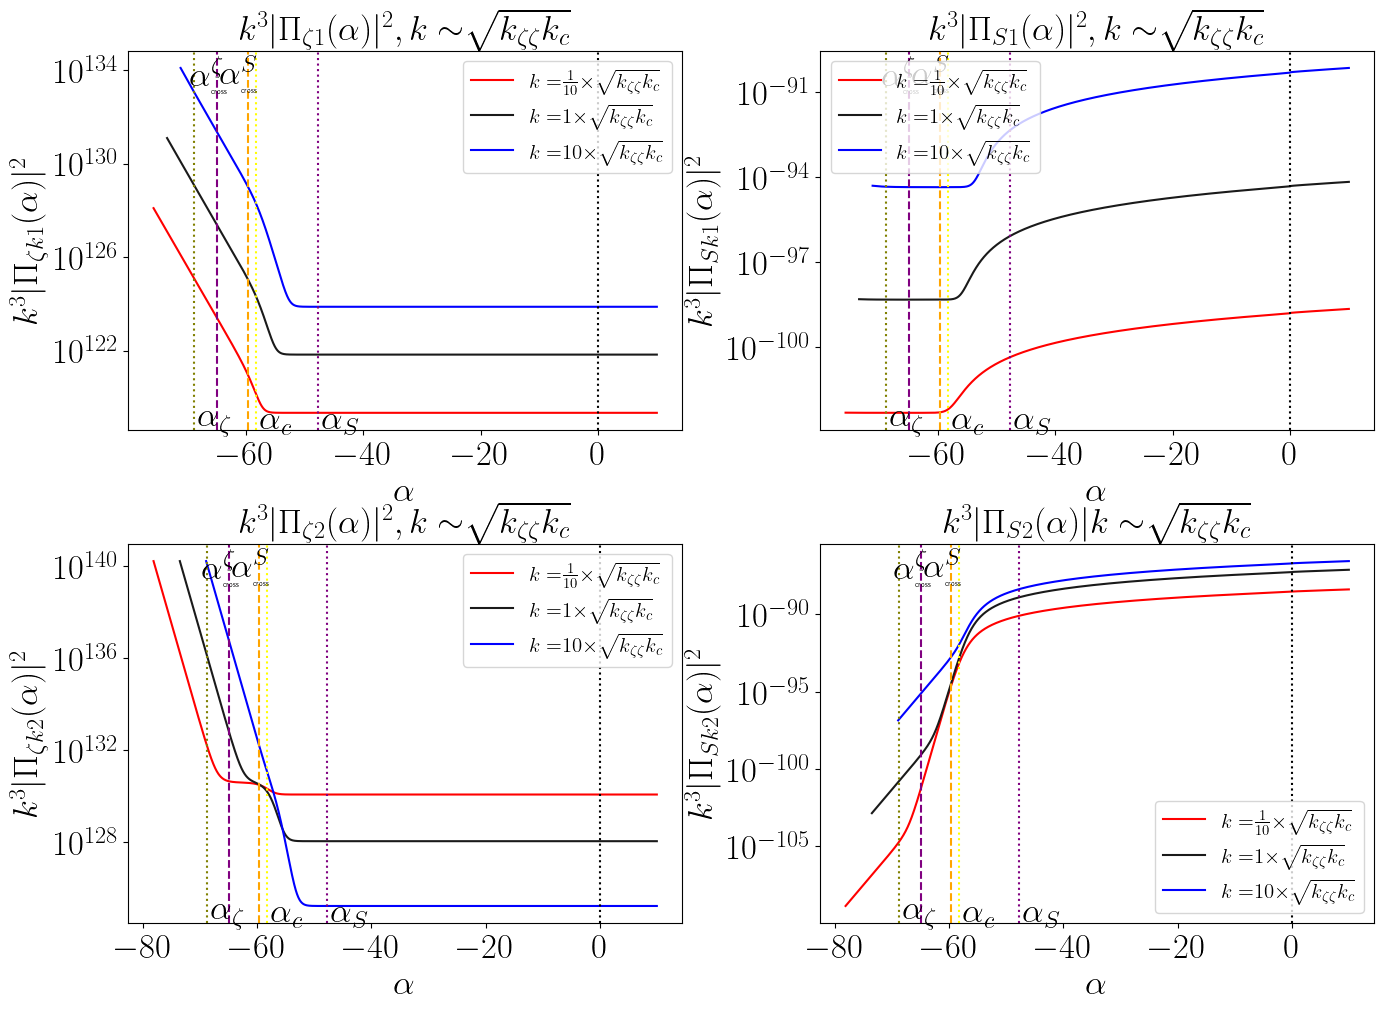


kc << k
-------------------------------------------------------------------------------------------------------------------------------------------------------------


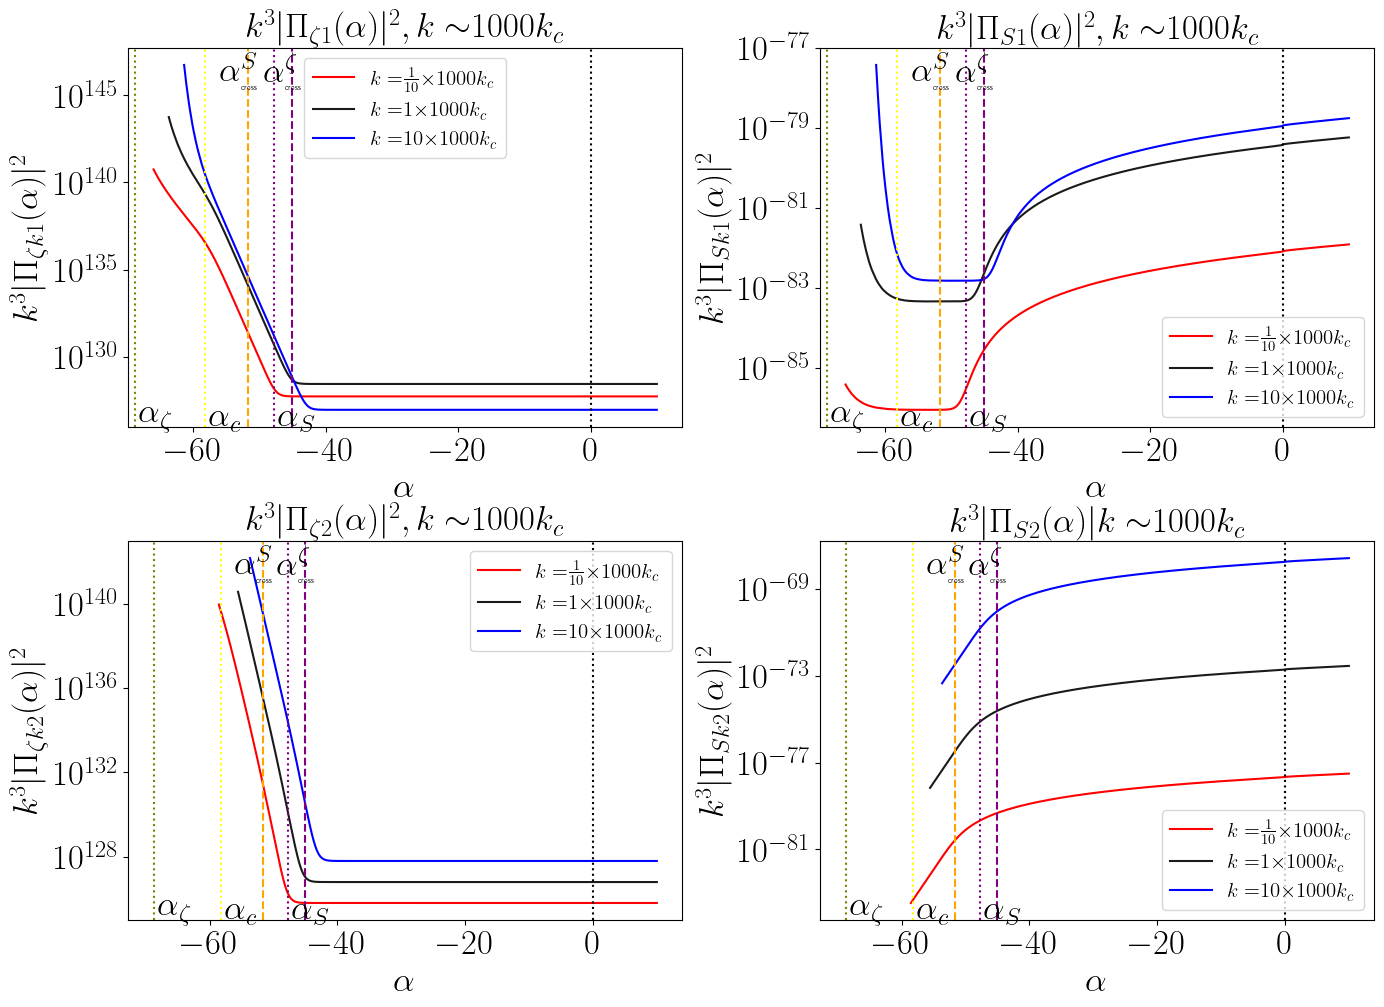

CPU times: user 9.32 s, sys: 142 ms, total: 9.46 s
Wall time: 10 s


In [ ]:
%%time

change_size()

# Color options
cmap = plt.get_cmap('hot')      # imports a "hot" type of colormap from Matplotlib
plt.set_cmap(cmap)              # sets the color map to "hot"

r = 2     # number of rows
c = 2     # number of columns

# defines a for loop to plot the norm of the coordinate modes times k³, {k³|ζkℓ|,k³|Skℓ|} for each value of 3 close values of k for each k in the k_colors list
for j in range(len( k_colors ) ):

  # prints the respective k interval
  if j==0:
    k_text = r'k << kζζ'
    k_val_text = r'$k_{\zeta\zeta}/1000$'
    k_name = 'pk_dust_colors'
  if j==1:
    k_text = 'kζζ < k < kc'
    k_val_text = r'$\sqrt{k_{\zeta\zeta}k_{c}}$'
    k_name = 'pk_trans_colors'
  if j==2:
    print()
    k_text = 'kc << k'
    k_val_text = r'$1000k_{c}$'
    k_name = 'pk_rad_colors'
  print(k_text)

  # Defines one r x c figure per value of k
  fig, ax = plt.subplots(r,c, figsize=(14, 10))                                               # sets the size of the figure
  fig.tight_layout()                                                                          # sets the size of each plot within the figure
  fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.25, hspace=0.3)   # sets the space between each plot

  twofluid_k = model_list_colors[j]    # defines a variable associated to the models per each value of k

  # defines a for loop to interate between the close values of k
  for l in range(3):
    k = k_sub_values[j][l]                             # sets k to be equal to each value of the list of close values of k
    # Defining the modes
    mode1_color = mode1_list_colors[j][l]  # defines a variable associated to the modes of Initial Condition 1 per each value of k
    mode2_color = mode2_list_colors[j][l]  # defines a variable associated to the modes of Initial Condition 2 per each value of k

    if l ==0:
      factor = r'$\frac{1}{10}\times$'
    if l ==1:
      factor = r'$1\times$'
    if l ==2:
      factor = r'${10}\times$'

    # the next lines define the colors of each mode

    # blue color
    if l == 2:
      m = 0           # red component set to 0
      n = 0           # green component set to 0
      p = 1           # blue component set to 1
    # black color
    if l == 1:
      m = 0.1         # red component set to 0.1
      n = 0.1         # green component set to 0.1
      p = 0.1         # blue component set to 0.1
    # red color
    if l == 0:
      m = 1           # red component set to 1
      n = 0           # green component set to 0.1
      p = 0           # blue component set to 0.1

    # the next lines plot the modes for each close value of k

    # Plots the Norm times k³ of the Adiabatic Momentum Modes
    ax[0,0].plot(mode1_color.t, ( k**3 * (mode1_color.pz_r()**2 + mode1_color.pz_im()**2 ) ) , label=r'$k = $'+factor+k_val_text, color=(m, n, p))              # plots k³|Πζk1|, the norm of the adiabatic mode times k³ associated to Initial Condition 1
    ax[0,1].plot(mode1_color.t, ( k**3 * (mode1_color.ps_r()**2 + mode1_color.ps_im()**2 ) ), label=r'$k = $'+factor+k_val_text, color=(m, n, p))               # plots k³|ΠSk1|, the norm of the entropy momentum mode times k³ associated to Initial Condition 1

    # Plots the Norm times k³ of the Entropy Momentum Modes
    ax[1,0].plot(mode2_color.t, ( k**3 * (mode2_color.pz_r()**2 + mode2_color.pz_im()**2 ) ) , label=r'$k = $'+factor+k_val_text, color=(m, n, p))              # plots k³|Πζk2|, the norm of the adiabatic momentum mode times k³ associated to Initial Condition 2
    ax[1,1].plot(mode2_color.t, ( k**3 * (mode2_color.ps_r()**2 + mode2_color.ps_im()**2 ) ) , label=r'$k = $'+factor+k_val_text, color=(m, n, p))              # plots k³|ΠSk2|, the norm of the entropy mode times k³ associated to Initial Condition 2

  k = k_colors[j]                   # sets k for each element of the k_colors[j] list
  #print('k ~ '+str(f"{k:.2e}"))     # prints the value of k for each mode

  # Titles
  ax[0,0].set_title(r'$k^{3}|\Pi_{\zeta 1}(\alpha)|^{2}$' + r"$, k \sim$" + k_val_text )   # sets the title of the adiabatic modes plot for Initial Condition 1
  ax[0,1].set_title(r'$k^{3}|\Pi_{S1}(\alpha)|^{2}$' + r"$, k \sim$" + k_val_text )        # sets the title of the entropy modes plot for Initial Condition 1
  ax[1,0].set_title(r'$k^{3}|\Pi_{\zeta 2}(\alpha)|^{2}$' + r"$, k \sim$" + k_val_text  )  # sets the title of the adiabatic modes plot for Initial Condition 2
  ax[1,1].set_title(r'$k^{3}|\Pi_{S2}(\alpha)|$' + r"$k \sim$" + k_val_text )          # sets the title of the entropy modes plot for Initial Condition 2

  # Sets the y labels
  ax[0,0].set_ylabel(r'$k^{3}|\Pi_{\zeta k1}(\alpha)|^{2}$')    # sets a label to the y axis of the k³ time the norm of adiabatic modes plot for Initial Condition 1
  ax[0,1].set_ylabel(r'$k^{3}|\Pi_{Sk1}(\alpha)|^{2}$')         # sets a label to the y axis of the k³ time the norm of entropy modes plot for Initial Condition 1
  ax[1,0].set_ylabel(r'$k^{3}|\Pi_{\zeta k2}(\alpha)|^{2}$')    # sets a label to the y axis of the k³ time the norm of adiabatic modes plot for Initial Condition 2
  ax[1,1].set_ylabel(r'$k^{3}|\Pi_{Sk2}(\alpha)|^{2}$')         # sets a label to the y axis of the k³ time the norm of entropy modes plot for Initial Condition 2

  # creates loops to iterate over each graph
  for i in range(r):                                    # iterates over each row
    for j in range(c):                                  # iterates over each column
      # Sets the y scales
      ax[i,j].set_yscale('log')                         # sets a log scale for the effective couplings plots

      # Characteristic Transition Times
      #ax[i,j].axvline(x = tz, color='olive', linestyle=':', label=r'$\alpha_{\zeta} \iff \phi_{\zeta}$')                  # plots αζ, the characteristic time instant for which the speed of sound of the adiabatic mode starts to vary
      #ax[i,j].axvline(x = ts, color='purple', linestyle=':', label=r'$\alpha_{S} \iff \phi_{S}$')                         # plots αS, the characteristic time instant for which the speed of sound of the entropy mode starts to vary
      #ax[i,j].axvline(x = tc, color='yellow', linestyle=':', label=r'$\alpha_{\hbox{\small crit}} \iff \phi = \frac{\pi}{4}$')   # plots αc, the transition time instant

      # Horizon Crossing Times of each mode
      #ax[i,j].axvline(x = twofluid_k.cross_z(k), color='purple', linestyle='--', label=r'$\alpha^{\zeta}_{ \hbox{\small cross} }$ = ' + f"{twofluid_k.cross_z(k):.2e}" ) # plots the time for which the adiabatic mode frequency coincides with its effective Hubble radius
      #ax[i,j].axvline(x = twofluid_k.cross_s(k), color='orange', linestyle='--', label=r'$\alpha^{S}_{ \hbox{\small cross} }$ = ' + f"{twofluid_k.cross_s(k):.2e}" )     # plots the time for which the entropy mode frequency coincides with its effective Hubble radius
      #ax[i,j].axvline(x = 0, color='black', linestyle=':', label=r'$\alpha = \alpha_{B} = 0$' )                                                            # plots the bouncing time instant

      # Characteristic Transition Times
      ax[i,j].axvline(x = tz, color='olive', linestyle=':')                  # plots αζ, the characteristic time instant for which the speed of sound of the adiabatic mode starts to vary
      ax[i,j].axvline(x = ts, color='purple', linestyle=':')                         # plots αS, the characteristic time instant for which the speed of sound of the entropy mode starts to vary
      ax[i,j].axvline(x = tc, color='yellow', linestyle=':')   # plots αc, the transition time instant

      # Horizon Crossing Times of each mode
      ax[i,j].axvline(x = twofluid_k.cross_z(k), color='purple', linestyle='--' ) # plots the time for which the adiabatic mode frequency coincides with its effective Hubble radius
      ax[i,j].axvline(x = twofluid_k.cross_s(k), color='orange', linestyle='--' )     # plots the time for which the entropy mode frequency coincides with its effective Hubble radius
      ax[i,j].axvline(x = 0, color='black', linestyle=':' )                                                            # plots the bouncing time instant


      # Labels
      ax[i,j].set_xlabel(r'$\alpha$')    # sets a label to x axis as time
      ax[i,j].legend(fontsize=15)        # prints the legend and sets the legend font size

      # Annotations

      # critical scale factors
      x0, y0 = 3, 18
      factor = 1
      ax[i,j].annotate(r'$\alpha_{c}$', xy=(tc, ax[i,j].set_ylim()[0] * factor), xycoords='data',
              xytext=(x0, y0), textcoords='offset points', color='black', verticalalignment='top')
      ax[i,j].annotate(r'$\alpha_{\zeta}$', xy=(tz, ax[i,j].set_ylim()[0] * factor), xycoords='data',
                    xytext=(x0, y0), textcoords='offset points', color='black', verticalalignment='top')
      ax[i,j].annotate(r'$\alpha_{S}$', xy=(ts, ax[i,j].set_ylim()[0] * factor), xycoords='data',
                   xytext=(x0, y0), textcoords='offset points', color='black', verticalalignment='top')

      # Hubble crossing times
      x0, y0 = -20, -3
      if [i,j] == [0,0]:
        factor = 0
      factor = 1
      ax[i,j].annotate(r'$\alpha^{\zeta}_{\hbox{\tiny cross }}$', xy=(twofluid_k.cross_z(k), ax[i,j].set_ylim()[-1] * factor), xycoords='data',
                    xytext=(x0, y0), textcoords='offset points', color='black', verticalalignment='top')
      ax[i,j].annotate(r'$\alpha^{S}_{\hbox{\tiny cross}}$ ', xy=(twofluid_k.cross_s(k), ax[i,j].set_ylim()[-1] * factor), xycoords='data',
                    xytext=(x0, y0), textcoords='offset points', color='black', verticalalignment='top')
      #ax[i,j].annotate(r'$\alpha = 0$ ', xy=(0, ax[i,j].set_ylim()[0] * factor), xycoords='data',
      #              xytext=(x0, y0), textcoords='offset points', color='black', verticalalignment='top')

  # a separator between each plot
  print('-------------------------------------------------------------------------------------------------------------------------------------------------------------')

###############################################################################################################################

  # shows the figure per each mode
  plt.savefig(f"graphs/"+k_name+".pdf", bbox_inches="tight")       # saves the figure
  plt.show()

In the above, we ploted the modes for the $k$ values

$$\require{xcolor}  \color{red}{ \frac{k}{3} },k , \color{blue}{ 3k }\, , $$

that is, the larger the value of $k$, more toward the blue, consistent with visual intuition. In particular, if the above plots have a mode with a $\color{red}{\text{red color}}$ with largest norm, then the spectrum has a $\color{red}{\text{red-tilt}}$ in that region, a $\color{blue}{\text{blue tilt}}$ if its the $\color{blue}{\text{blue one}}$, and scale invariance if the modes are close together.

Using the above considerations we have the following behaviors for the power spectra:

i) $k \ll k_{S\zeta}$:

1.  ${\cal P}_{\Pi_\zeta 1}(k)$  is $\color{blue}{\text{blue tilted}}$;

2. ${\cal P}_{\Pi_\zeta 2}(k)$ is essentially scale invariant;

3. ${\cal P}_{\Pi_S1}(k)$ is $\color{blue}{\text{blue tilted}}$ ;

4. ${\cal P}_{\Pi_S2}(k)$ is $\color{blue}{\text{blue tilted}}$;

ii) $k \approx k_{S\zeta}$:

1.  ${\cal P}_{\Pi_\zeta 1}(k)$  is $\color{blue}{\text{blue tilted}}$;

2. ${\cal P}_{\Pi_\zeta 2}(k)$ is essentially scale invariant;

3. ${\cal P}_{\Pi_S1}(k)$ is $\color{blue}{\text{blue tilted}}$ ;

4. ${\cal P}_{\Pi_S2}(k)$ is $\color{blue}{\text{blue tilted}}$;

iii) $k \approx k_{\zeta\zeta}$:

1.  ${\cal P}_{\Pi_\zeta 1}(k)$ is $\color{blue}{\text{blue tilted}}$;

2. ${\cal P}_{\Pi_\zeta 2}(k)$ is essentially scale invariant, with a very small $\color{red}{\text{red tilt}}$ ;

3. ${\cal P}_{\Pi_S1}(k)$ is $\color{blue}{\text{blue tilted}}$;

4. ${\cal P}_{\Pi_S2}(k)$ is $\color{blue}{\text{blue tilted}}$;

iv) $ k_{\zeta\zeta} < k < k_{c}$:

1.  ${\cal P}_{\Pi_\zeta 1}(k)$ is $\color{blue}{\text{blue tilted}}$;

2. ${\cal P}_{\Pi_\zeta 2}(k)$ is $\color{red}{\text{red tilted}}$;

3. ${\cal P}_{\Pi_S2}(k)$ is $\color{blue}{\text{blue tilted}}$ ;

4. ${\cal P}_{\Pi_S1}(k)$ is essentially scale invariant;

iv) $ k \approx k_{c}$:

1.  ${\cal P}_{\Pi_\zeta 1}(k)$ is $\color{blue}{\text{blue tilted}}$;

2. ${\cal P}_{\Pi_\zeta 2}(k)$ is $\color{blue}{\text{blue tilted}}$;

3. ${\cal P}_{\Pi_S1}(k)$ is $\color{blue}{\text{blue tilted}}$;

4. ${\cal P}_{\Pi_S2}(k)$ is $\color{blue}{\text{blue tilted}}$;

v) $ k > k_{c}$:

1.  ${\cal P}_{\Pi_\zeta 1}(k)$ is $\color{blue}{\text{blue tilted}}$;

2. ${\cal P}_{\Pi_\zeta 2}(k)$ is $\color{blue}{\text{blue tilted}}$;

3. ${\cal P}_{\Pi_S1}(k)$ is $\color{blue}{\text{blue tilted}}$;

4. ${\cal P}_{\Pi_S2}(k)$ is $\color{blue}{\text{blue tilted}}$.

## Appendix A: Super-Hubble expansion

# $\infty.$ Chaos: Unfinished Stuff / Tentatives

In [ ]:
pert = Nc.HIPertTwoFluids.new()
pert.set_stiff_solver(True)
prec = 1e-10
pert.props.reltol = prec

#k = 100 * kc

k = 1

pert.set_mode_k(k)

alpha_try = -twofluid.abs_alpha(1.0e-14 * k**2)
ci = Ncm.Vector.new(8)
alphai = pert.get_cross_time(twofluid, Nc.HIPertTwoFluidsCross.MODE1MAIN, alpha_try, 1.0e-13)
pert.get_init_cond_zetaS(twofluid, alphai, 1, 0.25 * math.pi, ci)
pert.set_init_cond(twofluid, alphai, 1, False, ci)

res = pert.evolve_array(twofluid, -10, 1.0e-4, 0.0)

4121


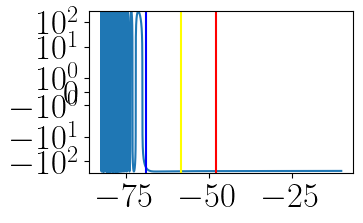

In [ ]:
t = res.get_col(0).dup_array()
z = res.get_col(4).dup_array()
print( len(z) )

plt.plot(t,z)
plt.axvline( x = tz, color = 'blue' )
plt.axvline( x = ts, color = 'red' )
plt.axvline( x = tc, color = 'yellow' )
plt.yscale('symlog')